# Proyecto final: Asignatura Visión por Computador

## Aplicación de técnicas de visión por computador para el entrenamiento de un modelo de reconocimiento de patrones

Integrantes y documentos:

*   Diego Eusse Naranjo - 1037655233
*   Juan Mauricio Herrera Durán - 1128453482
*   Rafael Arturo Matallana Lozano - 1017248867
*   Juan David Ramírez Sánchez - 1128430332

## **1. Metodología a implementar**

<p align = "justify"> Para el desarrollo del presente ejercicio, se seguirá el siguiente orden: </p>

- Origen y descripción del dataset

- Modelamiento de Datos

- Preprocesamiento de imágenes

- Segmentación de imágenes

- Extracción de características

- Reconocimiento de patrones

- Análisis de resultados

- Presentación de Conclusiones

## **2. Origen y descipción del dataset**

Se realiza un estudio inicial sobre las características estadísticas del dataset, su origen, cantidad de imágenes, tamaño de las imágenes, usos del dataset,  lo que permite conocer al dataset de una manera más clara.

Para la realización de este proyecto, cada uno de los miembros realizó una búsqueda inicial de datasets de imágenes para reconocimiento de patrones dentro de los repositorios recomendados por el profesor, con un énfasis especial en la plataforma Kaggle (https://www.kaggle.com/datasets) y cada uno seleccionó un conjunto de ellos que fuese de gusto o interés personal.

Posteriormente se realizó una elección entre todos los miembros del grupo y se escogió el dataset denominado 'Rock-Paper-Scissors Images: Images from the Rock-Paper-Scissors game', una colección de imágenes del clásico juego de piedra-papel-tijera. Este dataset fue desarollado por drgfreeman, a quien damos crédito, Ingeniero aeroespacial quien trabaja en el área de Data Science, por lo cual se tomó el trabajo de realizar esta colección de diferentes imágenes en un ambiente controlado, buscando generar imágenes más semejantes. Su perfil puede visualizarse en: https://www.kaggle.com/drgfreeman

Se trata de una colección de 2188 imágenes de las diferentes alternativas del juego: Piedra, Papel y Tijera. Este dataset fue posteado alrededor de hace 3 años, por lo que se asume que pertenece a mediados del año 2018 o principios del 2019.

A continuación se muestran algunas especificaciones y características del dataset escogido:

### **Link del dataset original**

https://www.kaggle.com/drgfreeman/rockpaperscissors

### **Algunas características generales**

* Este dataset contiene imágenes de las diferentes alternativas del juego, en 3 clases diferentes:  Piedra, Papel, Tijera.

* Las imágenes fueron capturadas como parte de un proyecto de hobby en el que se desarrolla un juego de Piedra-Papel-Tijeras utilizando la visión por ordenador y el aprendizaje automático en por medio de una Raspberry Pi.(https://github.com/DrGFreeman/rps-cv)

* La totalidad de las imágenes se sitúa sobre un fondo verde, lo cual permite realizar un trabajo de preprocesamiento y segmentación mucho más sencillo. Además, la ubicación de todas las alternativas del juego (piedra, papel, tijera) se presenta en la misma posición, de derecha a izquierda.

* El formato de las imágenes es '.png' para la totalidad de las imágenes, esto se verificará a continuación.

* Todas las imágenes pertenecen inicialmente al espacio de color RGB, pero durante el desarrollo de este notebook se realizarán varias operaciones sobre las imágenes, incluyendo cambios en los espacios de color.

* El dataset cuenta con imágenes de un ancho máximo de 300 px * alto máximo de 200 px, esto también se verificará a continuación, primero, de manera global sobre todo el conjunto de imágenes y luego, de manera local para cada clase: Piedra, Papel, Tijera.

* El dataset es ideal para trabajar y entrenar modelos de clasificación, detección y segmentación de objetos en imágenes.

### **Importamos librerías necesarias**

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths
import pandas as pd
import numpy as np 
import imutils
import cv2
import os
import glob
import random
import matplotlib.pyplot as plt
import os
import zipfile
import math
from PIL import Image
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore", category=FutureWarning)

### Clases en el dataset

In [2]:
ls RPS

 Volume in drive C is Windows
 Volume Serial Number is DEA9-6257

 Directory of C:\Users\diego.eusse\Desktop\IA\2Semestre\VisionComputador\RockPaperScissorsClassifier\RPS

30/12/2021  06:40 p.ÿm.    <DIR>          .
30/12/2021  06:40 p.ÿm.    <DIR>          ..
29/12/2021  04:40 p.ÿm.    <DIR>          paper
29/12/2021  04:40 p.ÿm.               889 README_rpc-cv-images.txt
29/12/2021  04:40 p.ÿm.    <DIR>          rock
29/12/2021  04:40 p.ÿm.    <DIR>          scissors
               1 File(s)            889 bytes
               5 Dir(s)  62.061.350.912 bytes free


Se observa que el dataset cuenta con 3 clases: Paper, Rock y Scissors. 

### Creación de directorios

In [3]:
# Creamos rutas para los datos
# Ruta general
base_dir = 'RPS'

# Sub rutas
Rock = base_dir + '/rock'
Paper = base_dir + '/paper'
Scissors = base_dir + '/scissors'

directories = [Rock, Paper, Scissors]

### Cantidad de imágenes

In [4]:
total = 0
for directory in directories:
    list = os.listdir(directory)
    number_files = len(list)
    total += number_files
    print('La carpeta ' + directory + ' tiene un total de ' + repr(number_files) + ' imágenes.')
print('Con lo que se tiene un total de ' + repr(total) + ' imágenes.')

La carpeta RPS/rock tiene un total de 726 imágenes.
La carpeta RPS/paper tiene un total de 712 imágenes.
La carpeta RPS/scissors tiene un total de 750 imágenes.
Con lo que se tiene un total de 2188 imágenes.


Se observa que es un dataset bastante balanceado en cuanto a la cantidad de imágenes para cada clase.

### **Formato de las imágenes**

In [5]:
formatos = []
for directorio in directories:
    for image in os.listdir(directorio):
        formato = Image.open(directorio + '/' + image).format
        formatos.append(formato)

formatos = set(formatos)
print(formatos)

{'PNG'}


Se observa que el dataset contiene imágenes en formato .png en su totalidad.

### Tamaño de las imágenes (análisis global)

In [6]:
max_width = 0
max_height = 0
max_width_file = ''
max_height_file = ''
max_width_folder = ''
max_height_folder = ''

for directorio in directories:
    for image in os.listdir(directorio):
        width, height = Image.open(directorio + '/' + image).size
        if width > max_width:
            max_width = width
            max_width_file = image
            max_width_folder = directorio
            
        if height > max_height:
            max_height = height
            max_height_file = image
            max_height_folder = directorio
        
print('Las dimensiones máximas encontradas son: ' + repr(max_width) + ' pixeles de ancho y ' + repr(max_height) + ' pixeles de alto.')
print('Los archivos con estas dimensiones máximas son: ' + max_width_folder + '/' + max_width_file + ' (Ancho) y ' + max_height_folder + '/' + max_height_file + ' (Alto).')

Las dimensiones máximas encontradas son: 300 pixeles de ancho y 200 pixeles de alto.
Los archivos con estas dimensiones máximas son: RPS/rock/00nKV8oHuTGi20gq.png (Ancho) y RPS/rock/00nKV8oHuTGi20gq.png (Alto).


Se comprueba lo dicho en la descripción del dataset: Las dimensiones máximas son 300 pixeles de ancho y 200 pixeles de alto.

### Tamaño de las imágenes (por clase)

In [7]:
for directorio in directories:
    max_width = 0
    max_height = 0
    max_width_file = ''
    max_height_file = ''
    for image in os.listdir(directorio):
        
        width, height = Image.open(directorio + '/' + image).size
        if width > max_width:
            max_width = width
            max_width_file = image
            
        if height > max_height:
            max_height = height
            max_height_file = image
    print('Directorio: ' + directorio)
    print('Dimensiones máximas: ' + repr(max_width) + ' (Ancho), ' + repr(max_height) + ' (Alto).')
    print('Archivos con dimensiones máximas: ' + max_width_file + ' (Ancho) y ' + max_height_file + ' (Alto).')
    print('\n')

Directorio: RPS/rock
Dimensiones máximas: 300 (Ancho), 200 (Alto).
Archivos con dimensiones máximas: 00nKV8oHuTGi20gq.png (Ancho) y 00nKV8oHuTGi20gq.png (Alto).


Directorio: RPS/paper
Dimensiones máximas: 300 (Ancho), 200 (Alto).
Archivos con dimensiones máximas: 04l5I8TqdzF9WDMJ.png (Ancho) y 04l5I8TqdzF9WDMJ.png (Alto).


Directorio: RPS/scissors
Dimensiones máximas: 300 (Ancho), 200 (Alto).
Archivos con dimensiones máximas: 0657zSfiTYzP2jrl.png (Ancho) y 0657zSfiTYzP2jrl.png (Alto).




## **3. Modelamiento de datos**

Una vez se tiene un conocimiento general de las características del dataset, se procede a realizar un modelamiento de datos. En esta sección se busca organizar y dividir al conjunto de datos entre conjuntos de entrenamiento (train), validación(val) y testeo(test), para posteriormente utilizarlos en la implementación del modelo. Se trabajará con un 70% de las imágenes para entrenamiento, un 20% para validación y un 10% para testeo del modelo final. Esta división puede realizarse por medio de las librerías de keras-tensorflow o también mediante la librería split-folders:

### **Utilizando Keras-Tensorflow:**

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *

Creación del conjunto de entrenamiento:

In [10]:
image_size = (256, 256)
batch = 32

train = keras.preprocessing.image_dataset_from_directory(
    'RPS/',
    validation_split=.3,
    subset='training',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 2188 files belonging to 3 classes.
Using 1532 files for training.


Creación del conjunto de validación:

In [11]:
validation = keras.preprocessing.image_dataset_from_directory(
    'RPS/',
    validation_split=.2,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 2188 files belonging to 3 classes.
Using 437 files for validation.


Creación del conjunto de testeo final:

In [12]:
test = keras.preprocessing.image_dataset_from_directory(
    'RPS/',
    validation_split=.1,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 2188 files belonging to 3 classes.
Using 218 files for validation.


Función para mostrar algunas imágenes de cierto dataset:

In [13]:
def display_samples(dataset, n_samples, classes_name):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(n_samples):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(classes_name[np.argmax(labels[i])])
            plt.axis("off")

Mostrar algunas imágenes del conjunto de entrenamiento:

(256, 256, 3)


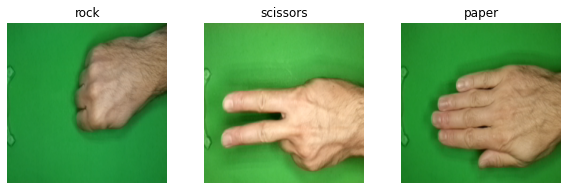

In [20]:
display_samples(train, 3, train.class_names)
for images, labels in train.take(1):
        for i in range(1):
            print(images[i].shape)

Mostrar algunas imágenes del conjunto de validación:

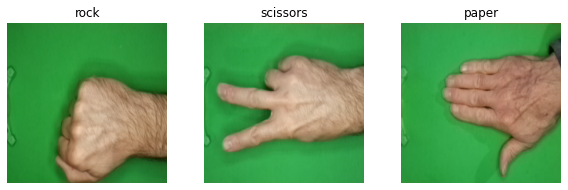

In [25]:
display_samples(validation, 3, validation.class_names)

Mostrar algunas imágenes del conjunto de testeo:

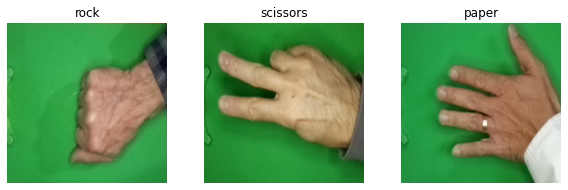

In [28]:
display_samples(test, 3, test.class_names)

### **Utilizando la librería split-folders:**

In [9]:
pip install split-folders

Se toman los conjuntos de imágenes para cada una de las alternativas del juego: Rock, Paper, Scissors y se genera un nuevo directorio 'ouput', donde se almacenarán 3 subdirectorios adicionales, correspondientes a los conjuntos de entrenamiento, validación y testeo, respectivamente. Se utiliza una división del 70% para entrenamiento, 20% para validación y 10% para testeo.

In [10]:
import splitfolders
splitfolders.ratio(base_dir, output="RPS/output", ratio=(0.7, 0.2, 0.1))

Copying files: 2188 files [00:17, 121.78 files/s]


Se verifica la creación de la carpeta 'output':

In [11]:
ls RPS\output

 Volume in drive C is Windows
 Volume Serial Number is DEA9-6257

 Directory of C:\Users\diego.eusse\Desktop\IA\2Semestre\VisionComputador\RockPaperScissorsClassifier\RPS\output

30/12/2021  06:53 p.ÿm.    <DIR>          .
30/12/2021  06:53 p.ÿm.    <DIR>          ..
30/12/2021  06:53 p.ÿm.    <DIR>          test
30/12/2021  06:53 p.ÿm.    <DIR>          train
30/12/2021  06:53 p.ÿm.    <DIR>          val
               0 File(s)              0 bytes
               5 Dir(s)  61.916.721.152 bytes free


### Funciones generales a utilizar en el procesamiento de imágenes:

In [12]:
def image_to_feature_vector(image, size=(128, 128)):
    # Convirtiendo imagen a un tamaño fijo y luego la aplanamos
    return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(8, 8, 8)):
  # Convertimos a HSV y obtenemos un histograma
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
        [0, 180, 0, 256, 0, 256])
    # Normalizamos hist
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    else:
        cv2.normalize(hist, hist)
    return hist.flatten()

### Generación de conjuntos de entrenamiento, validación y testeo con clases mezcladas, manteniendo las etiquetas de cada una de las imágenes:

Se actualizan rutas para los datos:

In [13]:
# Ruta general
base_dir = 'RPS/output/'

# Sub rutas
train_dir = base_dir + 'train/'
val_dir = base_dir + 'val/'
test_dir = base_dir + 'test/'

# Classes -> rock, paper, scissors

# Rutas entrenamiento por clases
train_rock_dir = train_dir + 'rock'
train_paper_dir = train_dir + 'paper'
train_scissors_dir = train_dir + 'scissors'

# Rutas validacion por clases
val_rock_dir = val_dir + 'rock'
val_paper_dir = val_dir + 'paper'
val_scissors_dir = val_dir + 'scissors'

# Rutas testeo por clases
test_rock_dir = test_dir + 'rock'
test_paper_dir = test_dir + 'paper'
test_scissors_dir = test_dir + 'scissors'

Se mezclan todos 'paths' de las diferentes clases para la creación de los datasets mezclados de entrenamiento, validación y testeo:

In [14]:
# Número de 'classes' en este caso vecinos para el algoritmo en como queremos agrupar
neighbors = 3
SEED = 42
root_dir = 'C:/Users/diego.eusse/Desktop/IA/2Semestre/VisionComputador/RockPaperScissorsClassifier/'

# Creamos un solo conjunto de datos entrenamiento combinando rutas de grapes y strawberries
# organizamos aleatoriamente # Classes -> rock, paper, scissors
data_rock = glob.glob(root_dir + train_rock_dir + '/*')
data_paper = glob.glob(root_dir + train_paper_dir + '/*')
data_scissors = glob.glob(root_dir + train_scissors_dir + '/*')
train_data_paths = data_rock + data_paper + data_scissors
random.shuffle(train_data_paths)

# Creamos un solo conjunto de datos de validación combinando rutas de grapes y strawberries
# organizamos aleatoriamente
val_rock = glob.glob(root_dir + val_rock_dir + '/*')
val_paper = glob.glob(root_dir + val_paper_dir + '/*')
val_scissors = glob.glob(root_dir + val_scissors_dir + '/*')
val_data_paths = val_rock + val_paper + val_scissors
random.shuffle(val_data_paths)

# Creamos un solo conjunto de datos testing combinando rutas de grapes y strawberries
# organizamos aleatoriamente
test_rock = glob.glob(root_dir + test_rock_dir + '/*')
test_paper = glob.glob(root_dir + test_paper_dir + '/*')
test_scissors = glob.glob(root_dir + test_scissors_dir + '/*')
test_data_paths = test_rock + test_paper + test_scissors
random.shuffle(test_data_paths)

In [15]:
print(f"Tamaño conjunto entrenamiento: {len(train_data_paths)}")
print(f"Tamaño conjunto de validación: {len(val_data_paths)}")
print(f"Tamaño conjunto testeo: {len(test_data_paths)}")
print(f"Tamaño total dataset: {len(train_data_paths) + len(val_data_paths) + len(test_data_paths)}")

Tamaño conjunto entrenamiento: 1531
Tamaño conjunto de validación: 437
Tamaño conjunto testeo: 220
Tamaño total dataset: 2188


Se genera un array con todas las imágenes de entrenamiento y otro con todos los labels de estas imágenes:

In [16]:
images = []
labels = []

for (i, imagePath) in enumerate(train_data_paths):
    # Leemos la imagen y obtenemos su etiqueta
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-2].split("/")[-1]
    
    # Obtenemos las carácteristicas de la imagen y su histograma
    pixels = image_to_feature_vector(image)
    
    # Guardamos todo en unos vectores
    images.append(pixels)
    labels.append(label)

# Convirtiendo a arrays numpy
trainImages = np.array(images)
trainLabels = np.array(labels)

In [17]:
print("Len trainImages: ", len(trainImages))
print("Len trainLabels: ", len(trainLabels))

Len trainImages:  1531
Len trainLabels:  1531


De manera similar, se realiza con los conjuntos de validación y testeo:

In [18]:
images = []
labels = []

for (i, imagePath) in enumerate(val_data_paths):
    # Leemos la imagen y obtenemos su etiqueta
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-2].split("/")[-1]
    
    # Obtenemos las carácteristicas de la imagen y su histograma
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    
    # Guardamos todo en unos vectores
    images.append(pixels)
    labels.append(label)

# Convirtiendo a arrays numpy
validationImages = np.array(images)
validationLabels = np.array(labels)

In [19]:
print("Len validationImages: ", len(validationImages))
print("Len validationLabels: ", len(validationLabels))

Len validationImages:  437
Len validationLabels:  437


In [20]:
images = []
labels = []

for (i, imagePath) in enumerate(test_data_paths):
    # Leemos la imagen y obtenemos su etiqueta
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-2].split("/")[-1]
    
    # Obtenemos las carácteristicas de la imagen y su histograma
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    
    # Guardamos todo en unos vectores
    images.append(pixels)
    labels.append(label)

# Convirtiendo a arrays numpy
testImages = np.array(images)
testLabels = np.array(labels)

In [21]:
print("Len testImages: ", len(testImages))
print("Len testLabels: ", len(testLabels))

Len testImages:  220
Len testLabels:  220


## **4. Preprocesamiento de imágenes**


En esta sección se toman algunas de las imágenes y se intenta predecir el pre-procesamiento general que se debe aplicar a las imágenes del dataset antes de la construcción del modelo. En general, se planea realizar un reshape para que cada una de las imágenes tenga un mismo tamaño y posteriormente, se podría aplicar algunos filtros, con la intención de reducir el ruido en ellas.

Se comienza por tomar alguna de las imágenes del dataset de entrenamiento (trainImages), luego de realizar su respectivo reshape a un tamaño convencional (128, 128) y 3 canales de color:

In [22]:
trainImages.shape

(1531, 49152)

In [23]:
trainImages[0].shape

(49152,)

scissors


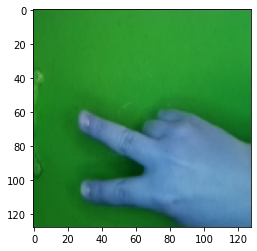

In [24]:
pic = np.reshape(trainImages[6], (128, 128, 3))
plt.imshow(pic, cmap="gray")
print(trainLabels[6])

Se intenta con un filtro de media:

Text(0.5, 1.0, 'Función Filter2D')

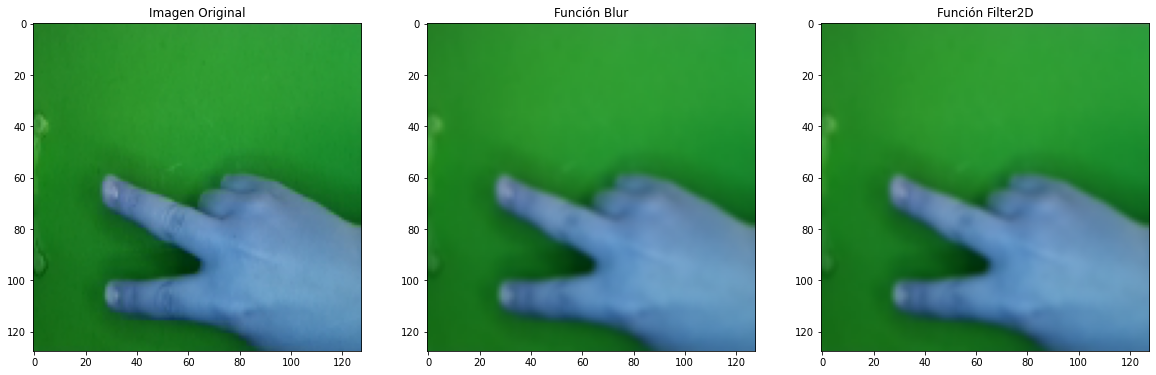

In [25]:
#Dar valor al tamaño del kernel
k_size = 3

#Aplicar suavizado mediante la función blur, con  un tipo de borde que puede cambiarse
res1 = cv2.blur(pic,(k_size,k_size),borderType=cv2.BORDER_REPLICATE)

#Aplicar el suavizado mediante filter2D
kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
res2 = cv2.filter2D(pic, ddepth= -1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)

#Generar un subplot de 1x3 para mostrar imagen original, Blur y Filter2D
fig = plt.figure(figsize=(20,24))

plt.subplot(1,3,1)
plt.imshow(pic,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,3,2)
plt.imshow(res1,cmap='gray')
plt.title("Función Blur")

plt.subplot(1,3,3)
plt.imshow(res2,cmap='gray')
plt.title("Función Filter2D")

Ensayemos con el filtro de mediana:

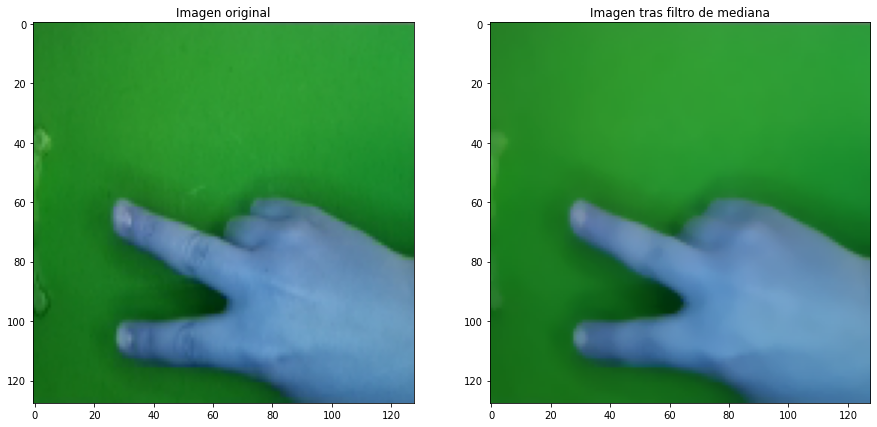

In [26]:
#Definir tamaño del kernel
k_size = 5
#Aplicar filtro de mediana a la imagen de entrada
medianBlurImg = cv2.medianBlur(pic, k_size)

#Generar un subplot 1x2 para mostrar imagen original e imagen tras filtro de mediana
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(pic, cmap="gray")

arreglo_plots[1].set_title('Imagen tras filtro de mediana')
arreglo_plots[1].imshow(medianBlurImg, cmap="gray")

Ensayamos finalmente con el filtro de máximo:

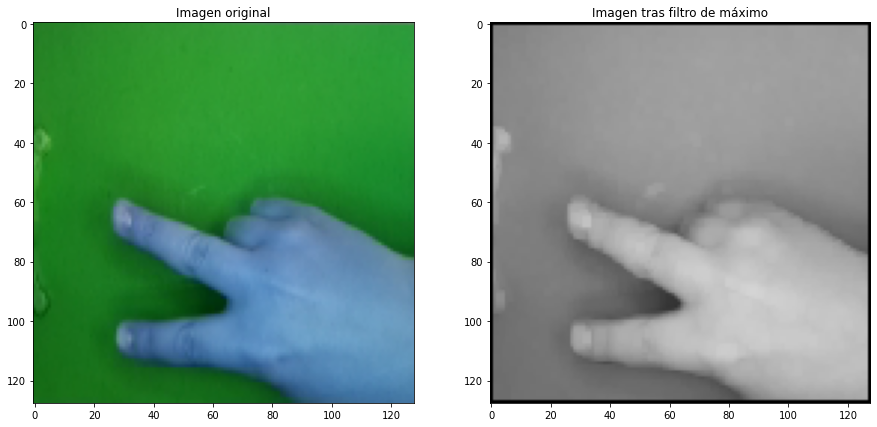

In [27]:
#Definir función de Filtro del Máximo
def maximum_filter(img,k_size):
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Radio del kernel
    r = math.floor(k_size/2)
    #Recorrer cada posición i,j de la imagen con el kernel
    for i in range(r, img.shape[0]-r):
        for j in range(r, img.shape[1]-r):
            #Tamaño de la ventana 
            window = img[i-r:i+r+1,j-r:j+r+1]
            #Cambiar el valor de la posición i,j de la imagen por el de la ventana
            max_val = np.max(window)
            res[i,j] = max_val
    return res

#Leer imagen de entrada
img = pic

#Definir tamaño del kernel
k_size = 3 

#Aplicar filtro del Máximo a la imagen
res = maximum_filter(img, k_size)
#Recordar el tipo de dato uint8, entre 0 y 255
res = res.astype(np.uint8)

#Generar un subplot 1x2 que muestre imagen original e imagen tras filtro de máximo
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen tras filtro de máximo')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

Y con el filtro de mínimo:

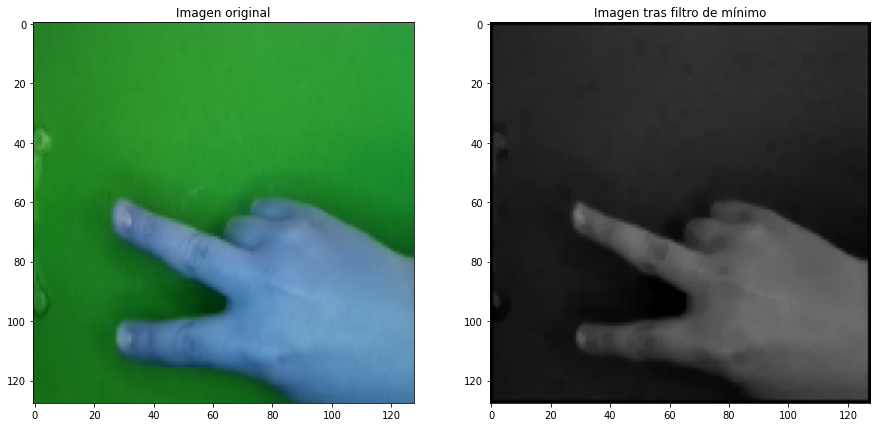

In [28]:
#Definir función filtro del mínimo
def minimum_filter(img,k_size):
    #Crear matriz de ceros del tamaño de imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Definir el radio del kernel
    r = math.floor(k_size/2)
    #Recorrer cada posición i,j de la imagen con el kernel
    for i in range(r, img.shape[0]-r):
        for j in range(r, img.shape[1]-r):
            #Tamaño de la ventana 
            window = img[i-r:i+r+1,j-r:j+r+1]
            #Cambiar el valor de la posición i,j de la imagen por el de la ventana
            min_val = np.min(window)
            res[i,j] = min_val
    return res

#Leer la imagen de entrada
img = pic

#Definir el radio del kernel
k_size = 3

#Aplicar filtro del mínimo a la imagen de entrada
res = minimum_filter(img, k_size)

#Tipo de dato entero, entre 0 y 255
res = res.astype(np.uint8)

#Generar subplot 1x2 para mostrar imagen original e imagen tras filtro del mínimo
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen tras filtro de mínimo')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

El filtro medianBlur retira relieves y detalles ruidosos de las manos (arrugas, vellos), conservando el contorno de las mismas. Se decide continuar con este filtro y con el reshape propuesto.

### **Cambio de espacio de color del espacio RGB al espacio HSV:**

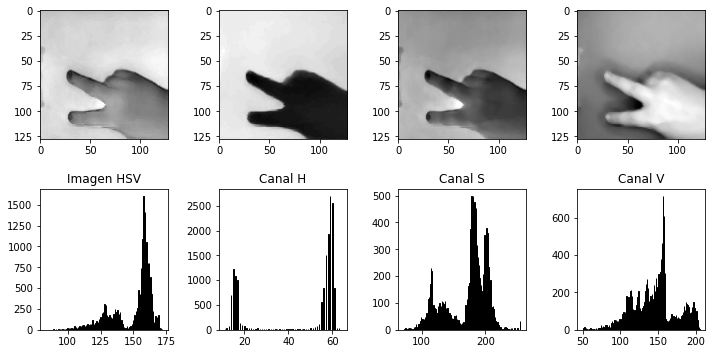

In [29]:
hsvImg = cv2.cvtColor(medianBlurImg, cv2.COLOR_BGR2HSV)

H = hsvImg[:,:,0]
S = hsvImg[:,:,1]
V = hsvImg[:,:,2]

idx = 1
fig1 = plt.figure(idx,figsize=(10, 10))
cols = 4

hsv_gray = cv2.cvtColor(hsvImg, cv2.COLOR_BGR2GRAY)

fig1.add_subplot(4, 4, 1)
plt.imshow(hsv_gray, cmap="gray")
fig1.add_subplot(4, 4, cols+1)
plt.hist(np.array(hsv_gray).ravel(), bins=256, fc='k', ec='k')
plt.title('Imagen HSV')

fig1.add_subplot(4, 4, 2)
plt.imshow(H, cmap='gray')
fig1.add_subplot(4, 4, cols+2)
plt.hist(np.array(H).ravel(),bins=256, fc='k', ec='k')
plt.title('Canal H')

fig1.add_subplot(4, 4, 3)
plt.imshow(S, cmap = 'gray')
fig1.add_subplot(4, 4, cols+3)
plt.hist(np.array(S).ravel(),bins=256, fc='k', ec='k')
plt.title('Canal S')

fig1.add_subplot(4, 4, 4)
plt.imshow(V, cmap = 'gray')
fig1.add_subplot(4, 4, cols+4)
plt.hist(np.array(V).ravel(),bins=256, fc='k', ec='k')
plt.title('Canal V')

plt.tight_layout()

Se decide continuar con el canal H luego del preprocesamiento realizado. Se aplica este mismo preprocesamiento para todas las imágenes de los diferentes datasets: entrenamiento, validación y testeo:

In [30]:
images = []
k_size = 5
# Llamar cada una de las imágenes del dataset de entrenamiento
for image in trainImages:
    # Realizar el reshape
    image = np.reshape(image, (128, 128, 3))
    #Aplicar suavizado mediante la función medianBlur
    res = cv2.medianBlur(image, k_size)
    hsvImg = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
    H = hsvImg[:,:,0]
    images.append(H)
trainImages = np.array(images)

Tenemos finalmente un array de 1531 imágenes de entrenamiento, suavizadas mediante el filtro medianBlur y con un tamaño de 128 * 128 pixeles cada una, en el canal H del espacio HSV:

In [31]:
trainImages.shape

(1531, 128, 128)

### Validation dataset

In [32]:
images = []
k_size = 5
# Llamar cada una de las imágenes del dataset de validación
for image in validationImages:
    # Realizar el reshape
    image = np.reshape(image, (128, 128, 3))
    #Aplicar suavizado mediante la función medianBlur
    res = cv2.medianBlur(image, k_size)
    hsvImg = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
    H = hsvImg[:,:,0]
    images.append(H)
validationImages = np.array(images)

In [33]:
validationImages.shape

(437, 128, 128)

### Test dataset

In [34]:
images = []
k_size = 5
# Llamar cada una de las imágenes del dataset de testeo
for image in testImages:
    # Realizar el reshape
    image = np.reshape(image, (128, 128, 3))
    #Aplicar suavizado mediante la función medianBlur
    res = cv2.medianBlur(image, k_size)
    hsvImg = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
    H = hsvImg[:,:,0]
    images.append(H)
testImages = np.array(images)

In [35]:
testImages.shape

(220, 128, 128)

## **5. Segmentación de imágenes**


La colección de imágenes presenta distintos tipos de imágenes en ambientes diferentes, ambientes no controlados, por lo que las características de cada una de las imágenes será diferente. Ante este escenario, es difícil aplicar un único modelo de segmentación para todas las imágenes, sin embargo, se intentará a continuación:

Ensayemos primero con una de las imágenes del conjunto *trainImages*, para tratar de predecir una segmentación más generalizada a aplicar a todo el conjunto. En este caso, se utiliza una imagen aleatoria. Observemos la imagen aleatoria luego del reshape y el filtro Blur realizado en la sección 4:

In [51]:
# Generar número aleatorio de imagen dentro del conjunto trainImages:
from random import randint
image_number = randint(0, len(trainImages))
print('La imagen a probar es la imagen número: ' + repr(image_number))

La imagen a probar es la imagen número: 1115


In [52]:
trainImages[image_number].shape

(128, 128)

paper


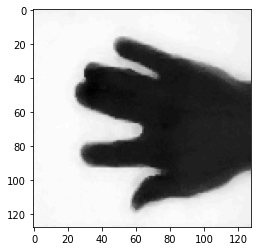

In [53]:
proof_image = trainImages[image_number]
plt.imshow(proof_image, cmap="gray")
print(trainLabels[image_number])

Se utiliza el método de segmentación OTSU, para encontrar el umbral de manera automática y lograr una segmentación óptima:

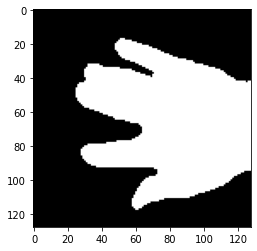

In [306]:
_, otsu = cv2.threshold(proof_image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(otsu, cmap="gray")

Se observa que con este procedimiento, se logra una segmentación bastante adecuada para esta imagen. Se utilizará este procedimiento para todas las imágenes de los diferentes datasets: entrenamiento, validación y testeo:

In [307]:
images = []
# Llamar cada una de las imágenes del dataset de entrenamiento
for image in trainImages:
    # Utilizar OTSU
    _, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    images.append(otsu)
trainImages = np.array(images)

Tenemos finalmente un array de 1531 imágenes de entrenamiento, suavizadas mediante el filtro medianBlur, con un tamaño de 128 * 128 pixeles cada una, segmentadas mediante OTSU, para el canal H del espacio HSV:

In [308]:
trainImages.shape

(1531, 128, 128)

### Validation dataset

In [309]:
images = []
# Llamar cada una de las imágenes del dataset de Validación
for image in validationImages:
    # Utilizar OTSU
    _, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    images.append(otsu)
validationImages = np.array(images)

In [310]:
validationImages.shape

(437, 128, 128)

### Test dataset

In [311]:
images = []
# Llamar cada una de las imágenes del dataset de testeo
for image in testImages:
    # Utilizar OTSU
    _, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    images.append(otsu)
testImages = np.array(images)

In [312]:
testImages.shape

(220, 128, 128)

## **6. Extracción de características**

Nos centraremos en el uso de descriptores de forma:

In [313]:
from skimage.measure import label, regionprops
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon

### **Características de forma**

In [314]:
#función de características de forma

def get_features_area(props, features):
    features['y_centroid'], features['x_centroid'] = props.local_centroid
    features['perimeter'] = props.perimeter
    features['area'] = props.area
    features['area_to_convex_ratio'] = props.area/props.convex_area
    features['compacity'] = props.perimeter**2/props.area
    features['area2_perimeter'] = props.area**2/props.perimeter
    features['area2'] = props.area**2
    features['perimeter2'] = props.perimeter**2
    if (props.minor_axis_length == 0 or props.major_axis_length == 0):
        features['mayor_menor'] = np.nan
        features['menor_mayor'] = np.nan
    else:
        features['mayor_menor'] = props.major_axis_length/props.minor_axis_length
        features['menor_mayor'] = props.minor_axis_length/props.major_axis_length
    features['area_perimeter_ratio'] = props.area / props.perimeter
    features['extent'] = props.extent
    features['min_row'], features['min_col'], features['max_row'], features['max_col'] = props.bbox
    features['max_min_col'] = features['max_col'] - features['min_col']
    return features

### Uniendo lo anterior
Combinamos lo anterior en una sola función get_features: esta función devuelve un diccionario de features con las características extraidas de una imagen del conjunto de datos.

In [315]:
#función que extrae características de una imagen
def get_features(index, image_number):
    features = {}
    datasets = [trainImages, validationImages, testImages]
    img = datasets[index][image_number]
    label_img = label(img)
    props = regionprops(label_img)[0]
    features = get_features_area(props, features)
    
    contour = find_contours(img, 0)[0]   
    coords = approximate_polygon(contour, tolerance=2.5)
    features['polygon_count'] = len(coords)
    features['perimeter_polygonCount'] = features['perimeter']/features['polygon_count']
    
    return features

Se obtienen las características para el dataset de entrenamiento:

In [316]:
features_0 = get_features(0,0)
columns = [k  for  k in  features_0.keys()]
columns.append('class')

#crear dataset de características de entrenamiento como dataframe de pandas
df_train = pd.DataFrame(columns=columns)

#extraer características de todas las imágenes de entrenamiento 
for i in range(len(trainImages)):
    features = get_features(0,i)
    df_train.loc[i] = [features[feature] for feature in features.keys()]+[trainLabels[i]]

<ipython-input-314-6185763c36fb>:9: RuntimeWarning: divide by zero encountered in true_divide
  features['area2_perimeter'] = props.area**2/props.perimeter
<ipython-input-314-6185763c36fb>:18: RuntimeWarning: divide by zero encountered in true_divide
  features['area_perimeter_ratio'] = props.area / props.perimeter


Guardar todas las características de todas las imágenes del set de entrenamiento en un dataframe de Pandas:

In [317]:
#leer el set como un dataframe de pandas
df_train

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  \
0      38.391279   42.112259  290.267027  5229              0.945399   
1      37.793922   37.220497  268.610173  4508              0.961604   
2      40.213055   45.931550  288.787843  4412              0.922048   
3      44.417669   41.094656  278.551299  5071              0.977260   
4      32.715691   56.586651  375.338095  4270              0.762772   
...          ...         ...         ...   ...                   ...   
1526   61.183191   49.464096  333.137085  4902              0.830285   
1527   40.840452   63.664608  372.450793  7609              0.938919   
1528   41.137652   54.980027  360.592929  3705              0.772358   
1529   34.654954   48.509408  274.994949  4411              0.946160   
1530   44.738115   49.992556  342.350288  5911              0.888338   

      compacity  area2_perimeter     area2     perimeter2  mayor_menor  ...  \
0     16.113013     94197.543737  27342441   84254.947140     1.250137  ...   
1     16.005196     75656.345286  20322064   72151.425069     1.158107  ...   
2     18.902633     67404.998167  19465744   83398.418025     1.332975  ...   
3     15.300893     92317.074570  25715041   77590.825925     1.171803  ...   
4     32.992666     48577.270033  18232900  140878.685646     1.579926  ...   
...         ...              ...       ...            ...          ...  ...   
1526  22.639804     72131.278932  24029604  110980.317396     1.129572  ...   
1527  18.230989    155448.402882  57896881  138719.593570     1.521220  ...   
1528  35.095077     38067.926162  13727025  130027.260526     1.929502  ...   
1529  17.144009     70753.739459  19456921   75622.222177     1.523774  ...   
1530  19.828070    102058.979301  34939921  117203.719985     1.723172  ...   

      area_perimeter_ratio    extent  min_row min_col max_row max_col  \
0                18.014447  0.798077       28      44     106     128   
1                16.782685  0.812545       25      55     101     128   
2                15.277651  0.664258       37      47     119     128   
3                18.204905  0.768333       37      53     125     128   
4                11.376410  0.651411       59      33     128     128   
...                    ...       ...      ...     ...     ...     ...   
1526             14.714663  0.570000        5      42     105     128   
1527             20.429544  0.743502       28       9     114     128   
1528             10.274744  0.524194       52      35     128     128   
1529             16.040295  0.728850       26      39      94     128   
1530             17.265941  0.668665       26      24     111     128   

     max_min_col polygon_count perimeter_polygonCount     class  
0             84            12              24.188919      rock  
1             73            10              26.861017      rock  
2             81            10              28.878784     paper  
3             75             8              34.818912      rock  
4             95            14              26.809864  scissors  
...          ...           ...                    ...       ...  
1526          86            13              25.625930     paper  
1527         119            16              23.278175     paper  
1528          93            14              25.756638  scissors  
1529          89            10              27.499495     paper  
1530         104            11              31.122753      rock  

[1531 rows x 21 columns]

Debido a algunas inconsistencias matemáticas en la generación de características, algunas de ellas toman valores tipo NaN. Se decide remover aquellos registros (imágenes) que contienen NaNs, para evitar problemas más adelante en el entrenamiento de los modelos predictivos:

In [318]:
df_train.dropna(inplace=True)
df_train

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  \
0      38.391279   42.112259  290.267027  5229              0.945399   
1      37.793922   37.220497  268.610173  4508              0.961604   
2      40.213055   45.931550  288.787843  4412              0.922048   
3      44.417669   41.094656  278.551299  5071              0.977260   
4      32.715691   56.586651  375.338095  4270              0.762772   
...          ...         ...         ...   ...                   ...   
1526   61.183191   49.464096  333.137085  4902              0.830285   
1527   40.840452   63.664608  372.450793  7609              0.938919   
1528   41.137652   54.980027  360.592929  3705              0.772358   
1529   34.654954   48.509408  274.994949  4411              0.946160   
1530   44.738115   49.992556  342.350288  5911              0.888338   

      compacity  area2_perimeter     area2     perimeter2  mayor_menor  ...  \
0     16.113013     94197.543737  27342441   84254.947140     1.250137  ...   
1     16.005196     75656.345286  20322064   72151.425069     1.158107  ...   
2     18.902633     67404.998167  19465744   83398.418025     1.332975  ...   
3     15.300893     92317.074570  25715041   77590.825925     1.171803  ...   
4     32.992666     48577.270033  18232900  140878.685646     1.579926  ...   
...         ...              ...       ...            ...          ...  ...   
1526  22.639804     72131.278932  24029604  110980.317396     1.129572  ...   
1527  18.230989    155448.402882  57896881  138719.593570     1.521220  ...   
1528  35.095077     38067.926162  13727025  130027.260526     1.929502  ...   
1529  17.144009     70753.739459  19456921   75622.222177     1.523774  ...   
1530  19.828070    102058.979301  34939921  117203.719985     1.723172  ...   

      area_perimeter_ratio    extent  min_row min_col max_row max_col  \
0                18.014447  0.798077       28      44     106     128   
1                16.782685  0.812545       25      55     101     128   
2                15.277651  0.664258       37      47     119     128   
3                18.204905  0.768333       37      53     125     128   
4                11.376410  0.651411       59      33     128     128   
...                    ...       ...      ...     ...     ...     ...   
1526             14.714663  0.570000        5      42     105     128   
1527             20.429544  0.743502       28       9     114     128   
1528             10.274744  0.524194       52      35     128     128   
1529             16.040295  0.728850       26      39      94     128   
1530             17.265941  0.668665       26      24     111     128   

     max_min_col polygon_count perimeter_polygonCount     class  
0             84            12              24.188919      rock  
1             73            10              26.861017      rock  
2             81            10              28.878784     paper  
3             75             8              34.818912      rock  
4             95            14              26.809864  scissors  
...          ...           ...                    ...       ...  
1526          86            13              25.625930     paper  
1527         119            16              23.278175     paper  
1528          93            14              25.756638  scissors  
1529          89            10              27.499495     paper  
1530         104            11              31.122753      rock  

[1482 rows x 21 columns]

Se realiza la separación entre X_train y Y_train, con los datos de entrenamiento y los labels de entrenamiento, respectivamente:

In [319]:
X_train = df_train.loc[:, df_train.columns != 'class']
X_train.head()

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  compacity  \
0   38.391279   42.112259  290.267027  5229              0.945399  16.113013   
1   37.793922   37.220497  268.610173  4508              0.961604  16.005196   
2   40.213055   45.931550  288.787843  4412              0.922048  18.902633   
3   44.417669   41.094656  278.551299  5071              0.977260  15.300893   
4   32.715691   56.586651  375.338095  4270              0.762772  32.992666   

   area2_perimeter     area2     perimeter2  mayor_menor  menor_mayor  \
0     94197.543737  27342441   84254.947140     1.250137     0.799913   
1     75656.345286  20322064   72151.425069     1.158107     0.863478   
2     67404.998167  19465744   83398.418025     1.332975     0.750202   
3     92317.074570  25715041   77590.825925     1.171803     0.853386   
4     48577.270033  18232900  140878.685646     1.579926     0.632941   

   area_perimeter_ratio    extent min_row min_col max_row max_col max_min_col  \
0             18.014447  0.798077      28      44     106     128          84   
1             16.782685  0.812545      25      55     101     128          73   
2             15.277651  0.664258      37      47     119     128          81   
3             18.204905  0.768333      37      53     125     128          75   
4             11.376410  0.651411      59      33     128     128          95   

  polygon_count  perimeter_polygonCount  
0            12               24.188919  
1            10               26.861017  
2            10               28.878784  
3             8               34.818912  
4            14               26.809864

In [320]:
Y_train = df_train[['class']]
Y_train.head()

class
0      rock
1      rock
2     paper
3      rock
4  scissors

Se replica este mismo procedimiento con los datasets de validación y testeo:

### Validation Dataset

In [321]:
features_1 = get_features(1,0)
columns = [k  for  k in  features_1.keys()]
columns.append('class')

#crear dataset de características de entrenamiento como dataframe de pandas
df_val = pd.DataFrame(columns=columns)

#extraer características de todas las imágenes de validación
for i in range(len(validationImages)):
    features = get_features(1, i)
    df_val.loc[i] = [features[feature] for feature in features.keys()]+[validationLabels[i]]

<ipython-input-314-6185763c36fb>:9: RuntimeWarning: divide by zero encountered in true_divide
  features['area2_perimeter'] = props.area**2/props.perimeter
<ipython-input-314-6185763c36fb>:18: RuntimeWarning: divide by zero encountered in true_divide
  features['area_perimeter_ratio'] = props.area / props.perimeter


In [322]:
df_val.dropna(inplace=True)
df_val

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  \
0     15.753846    0.492308   65.207107    65              1.000000   
1     31.890103   60.213776  375.279221  4486              0.745678   
2     41.478206   40.732543  282.551299  4726              0.925397   
3     43.687400   43.928828  286.793939  5016              0.935297   
4     36.976473   58.103358  395.314755  4973              0.798747   
..          ...         ...         ...   ...                   ...   
432   39.821027   55.751965  328.166522  6487              0.954111   
433   45.903444   34.758504  280.409163  4733              0.946032   
434   39.201700   36.520723  276.852814  4705              0.950889   
435   35.025110   64.326430  416.350288  5456              0.786507   
436   37.880555   29.589301  244.166522  3533              0.947185   

     compacity  area2_perimeter     area2     perimeter2  mayor_menor  ...  \
0    65.414873        64.793551      4225    4251.966775    18.777245  ...   
1    31.394225     53624.594421  20124196  140834.493424     1.447141  ...   
2    16.892771     79047.861802  22335076   79835.236314     1.161221  ...   
3    16.397680     87729.385310  25160256   82250.763584     1.168895  ...   
4    31.424443     62559.590092  24730729  156273.755141     1.498259  ...   
..         ...              ...       ...            ...          ...  ...   
432  16.601398    128231.145312  42081169  107693.266320     1.240213  ...   
433  16.612994     79887.863742  22401289   78629.298654     1.364308  ...   
434  16.290644     79959.544932  22137025   76647.480477     1.411148  ...   
435  31.771914     71497.334883  29767936  173347.562672     1.654130  ...   
436  16.874410     51121.213856  12482089   59617.290583     1.450969  ...   

     area_perimeter_ratio    extent  min_row min_col max_row max_col  \
0                0.996824  0.984848        0       0      33       2   
1               11.953766  0.640857       23      28      93     128   
2               16.726166  0.729321       19      48     100     128   
3               17.489909  0.710884       42      44     126     128   
4               12.579849  0.674488       20      27      93     128   
..                    ...       ...      ...     ...     ...     ...   
432             19.767403  0.791098       14      28      96     128   
433             16.878906  0.759711       29      58     118     128   
434             16.994590  0.784952       47      54     128     128   
435             13.104350  0.725146       12      14      78     128   
436             14.469633  0.726955       11      68      92     128   

    max_min_col polygon_count perimeter_polygonCount     class  
0             2             2              32.603553     paper  
1           100            14              26.805659  scissors  
2            80            11              25.686482      rock  
3            84            11              26.072176      rock  
4           101            16              24.707172  scissors  
..          ...           ...                    ...       ...  
432         100            13              25.243579     paper  
433          70            10              28.040916      rock  
434          74             6              46.142136      rock  
435         114            18              23.130572  scissors  
436          60             7              34.880932      rock  

[420 rows x 21 columns]

Se realiza la separación entre X_val y Y_val, con los datos de validación y los labels de validación, respectivamente:

In [323]:
X_val = df_val.loc[:, df_val.columns != 'class']
X_val.head()

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  compacity  \
0   15.753846    0.492308   65.207107    65              1.000000  65.414873   
1   31.890103   60.213776  375.279221  4486              0.745678  31.394225   
2   41.478206   40.732543  282.551299  4726              0.925397  16.892771   
3   43.687400   43.928828  286.793939  5016              0.935297  16.397680   
4   36.976473   58.103358  395.314755  4973              0.798747  31.424443   

   area2_perimeter     area2     perimeter2  mayor_menor  menor_mayor  \
0        64.793551      4225    4251.966775    18.777245     0.053256   
1     53624.594421  20124196  140834.493424     1.447141     0.691018   
2     79047.861802  22335076   79835.236314     1.161221     0.861162   
3     87729.385310  25160256   82250.763584     1.168895     0.855509   
4     62559.590092  24730729  156273.755141     1.498259     0.667441   

   area_perimeter_ratio    extent min_row min_col max_row max_col max_min_col  \
0              0.996824  0.984848       0       0      33       2           2   
1             11.953766  0.640857      23      28      93     128         100   
2             16.726166  0.729321      19      48     100     128          80   
3             17.489909  0.710884      42      44     126     128          84   
4             12.579849  0.674488      20      27      93     128         101   

  polygon_count  perimeter_polygonCount  
0             2               32.603553  
1            14               26.805659  
2            11               25.686482  
3            11               26.072176  
4            16               24.707172

In [324]:
Y_val = df_val[['class']]
Y_val.head()

class
0     paper
1  scissors
2      rock
3      rock
4  scissors

### Test Dataset

In [325]:
features_2 = get_features(2, 0)
columns = [k  for  k in  features_2.keys()]
columns.append('class')

#crear dataset de características de entrenamiento como dataframe de pandas
df_test = pd.DataFrame(columns=columns)

#extraer características de todas las imágenes de entrenamiento 
for i in range(len(testImages)):
    features = get_features(2, i)
    df_test.loc[i] = [features[feature] for feature in features.keys()]+[testLabels[i]]

<ipython-input-314-6185763c36fb>:9: RuntimeWarning: divide by zero encountered in true_divide
  features['area2_perimeter'] = props.area**2/props.perimeter
<ipython-input-314-6185763c36fb>:18: RuntimeWarning: divide by zero encountered in true_divide
  features['area_perimeter_ratio'] = props.area / props.perimeter


In [326]:
df_test

y_centroid  x_centroid   perimeter   area  area_to_convex_ratio  \
0     39.510249   47.503627  337.965512   3171              0.687703   
1     42.131659   42.920769  318.409163   5932              0.934762   
2     37.562364   57.127998  375.480231   4586              0.786621   
3     16.196721    0.459016   59.000000     61              0.968254   
4     34.076749   54.001354  367.580736   4430              0.800940   
..          ...         ...         ...    ...                   ...   
215   35.612946   64.089937  415.557395   5237              0.761856   
216   32.686699   44.669005  301.651804   3278              0.820937   
217   64.982111   54.930615  593.338095  13807              0.842712   
218   38.843960   62.617636  362.509668   5364              0.886319   
219   40.328078   49.489263  356.450793   3679              0.723074   

     compacity  area2_perimeter      area2     perimeter2  mayor_menor  ...  \
0    36.020400     29752.269506   10055241  114220.687379     1.409798  ...   
1    17.091098    110513.854804   35188624  101384.395037     1.156912  ...   
2    30.742565     56011.992851   21031396  140985.403677     1.531473  ...   
3    57.065574        63.067797       3721    3481.000000    17.946073  ...   
4    30.500135     53389.359366   19624900  135115.597334     1.412193  ...   
..         ...              ...        ...            ...          ...  ...   
215  32.974594     65998.510233   27426169  172687.948711     1.718460  ...   
216  27.758942     35621.481029   10745284   90993.810625     1.854837  ...   
217  25.497943    321289.414196  190633249  352050.095117     1.177675  ...   
218  24.499116     79370.285928   28772496  131413.259388     1.635831  ...   
219  34.535789     37971.695525   13535041  127057.168179     1.446119  ...   

     area_perimeter_ratio    extent  min_row min_col max_row max_col  \
0                9.382614  0.521546       40      52     120     128   
1               18.630117  0.793472       34      39     118     128   
2               12.213692  0.668513       10      30      80     128   
3                1.033898  0.924242        0       0      33       2   
4               12.051774  0.721733       34      35     100     128   
..                    ...       ...      ...     ...     ...     ...   
215             12.602351  0.637570       31      17     105     128   
216             10.866834  0.627969       33      38      91     128   
217             23.270038  0.842712        0       0     128     128   
218             14.796847  0.719807       31      20     100     128   
219             10.321200  0.560738       16      47      97     128   

    max_min_col polygon_count perimeter_polygonCount     class  
0            76            14              24.140394  scissors  
1            89            12              26.534097      rock  
2            98            15              25.032015  scissors  
3             2             2              29.500000     paper  
4            93            17              21.622396  scissors  
..          ...           ...                    ...       ...  
215         111            17              24.444553  scissors  
216          90            16              18.853238     paper  
217         128             7              84.762585     paper  
218         108            14              25.893548  scissors  
219          81            14              25.460771  scissors  

[220 rows x 21 columns]

In [327]:
df_test.dropna(inplace=True)
df_test

y_centroid  x_centroid   perimeter   area  area_to_convex_ratio  \
0     39.510249   47.503627  337.965512   3171              0.687703   
1     42.131659   42.920769  318.409163   5932              0.934762   
2     37.562364   57.127998  375.480231   4586              0.786621   
3     16.196721    0.459016   59.000000     61              0.968254   
4     34.076749   54.001354  367.580736   4430              0.800940   
..          ...         ...         ...    ...                   ...   
215   35.612946   64.089937  415.557395   5237              0.761856   
216   32.686699   44.669005  301.651804   3278              0.820937   
217   64.982111   54.930615  593.338095  13807              0.842712   
218   38.843960   62.617636  362.509668   5364              0.886319   
219   40.328078   49.489263  356.450793   3679              0.723074   

     compacity  area2_perimeter      area2     perimeter2  mayor_menor  ...  \
0    36.020400     29752.269506   10055241  114220.687379     1.409798  ...   
1    17.091098    110513.854804   35188624  101384.395037     1.156912  ...   
2    30.742565     56011.992851   21031396  140985.403677     1.531473  ...   
3    57.065574        63.067797       3721    3481.000000    17.946073  ...   
4    30.500135     53389.359366   19624900  135115.597334     1.412193  ...   
..         ...              ...        ...            ...          ...  ...   
215  32.974594     65998.510233   27426169  172687.948711     1.718460  ...   
216  27.758942     35621.481029   10745284   90993.810625     1.854837  ...   
217  25.497943    321289.414196  190633249  352050.095117     1.177675  ...   
218  24.499116     79370.285928   28772496  131413.259388     1.635831  ...   
219  34.535789     37971.695525   13535041  127057.168179     1.446119  ...   

     area_perimeter_ratio    extent  min_row min_col max_row max_col  \
0                9.382614  0.521546       40      52     120     128   
1               18.630117  0.793472       34      39     118     128   
2               12.213692  0.668513       10      30      80     128   
3                1.033898  0.924242        0       0      33       2   
4               12.051774  0.721733       34      35     100     128   
..                    ...       ...      ...     ...     ...     ...   
215             12.602351  0.637570       31      17     105     128   
216             10.866834  0.627969       33      38      91     128   
217             23.270038  0.842712        0       0     128     128   
218             14.796847  0.719807       31      20     100     128   
219             10.321200  0.560738       16      47      97     128   

    max_min_col polygon_count perimeter_polygonCount     class  
0            76            14              24.140394  scissors  
1            89            12              26.534097      rock  
2            98            15              25.032015  scissors  
3             2             2              29.500000     paper  
4            93            17              21.622396  scissors  
..          ...           ...                    ...       ...  
215         111            17              24.444553  scissors  
216          90            16              18.853238     paper  
217         128             7              84.762585     paper  
218         108            14              25.893548  scissors  
219          81            14              25.460771  scissors  

[212 rows x 21 columns]

Se realiza la separación entre X_test y Y_test, con los datos de testeo y los labels de testeo, respectivamente:

In [328]:
X_test = df_test.loc[:, df_test.columns != 'class']
X_test.head()

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  compacity  \
0   39.510249   47.503627  337.965512  3171              0.687703  36.020400   
1   42.131659   42.920769  318.409163  5932              0.934762  17.091098   
2   37.562364   57.127998  375.480231  4586              0.786621  30.742565   
3   16.196721    0.459016   59.000000    61              0.968254  57.065574   
4   34.076749   54.001354  367.580736  4430              0.800940  30.500135   

   area2_perimeter     area2     perimeter2  mayor_menor  menor_mayor  \
0     29752.269506  10055241  114220.687379     1.409798     0.709321   
1    110513.854804  35188624  101384.395037     1.156912     0.864370   
2     56011.992851  21031396  140985.403677     1.531473     0.652966   
3        63.067797      3721    3481.000000    17.946073     0.055722   
4     53389.359366  19624900  135115.597334     1.412193     0.708118   

   area_perimeter_ratio    extent min_row min_col max_row max_col max_min_col  \
0              9.382614  0.521546      40      52     120     128          76   
1             18.630117  0.793472      34      39     118     128          89   
2             12.213692  0.668513      10      30      80     128          98   
3              1.033898  0.924242       0       0      33       2           2   
4             12.051774  0.721733      34      35     100     128          93   

  polygon_count  perimeter_polygonCount  
0            14               24.140394  
1            12               26.534097  
2            15               25.032015  
3             2               29.500000  
4            17               21.622396

In [329]:
Y_test = df_test[['class']]
Y_test.head()

class
0  scissors
1      rock
2  scissors
3     paper
4  scissors

## **7. Selección de características**
Inicialmente se realiza una estandarización para cada uno de los datasets de características:

In [330]:
features = (X_train.columns).tolist()
features

['y_centroid',
 'x_centroid',
 'perimeter',
 'area',
 'area_to_convex_ratio',
 'compacity',
 'area2_perimeter',
 'area2',
 'perimeter2',
 'mayor_menor',
 'menor_mayor',
 'area_perimeter_ratio',
 'extent',
 'min_row',
 'min_col',
 'max_row',
 'max_col',
 'max_min_col',
 'polygon_count',
 'perimeter_polygonCount']

Estandarización del dataset de características de entrenamiento:

In [331]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = features
X_train.head()

y_centroid  x_centroid  perimeter      area  area_to_convex_ratio  \
0   -0.113671   -0.572989  -0.646776  0.093050              0.887891   
1   -0.191226   -0.956741  -0.915982 -0.367971              1.071409   
2    0.122847   -0.273371  -0.665163 -0.429355              0.623459   
3    0.668727   -0.652819  -0.792409 -0.007978              1.248698   
4   -0.850526    0.562506   0.410702 -0.520152             -1.180246   

   compacity  area2_perimeter     area2  perimeter2  mayor_menor  menor_mayor  \
0  -0.925443         0.373359 -0.049479   -0.706137    -0.234803     0.908256   
1  -0.936372        -0.093760 -0.417000   -0.923142    -0.275098     1.396871   
2  -0.642669        -0.301641 -0.461829   -0.721493    -0.198531     0.526136   
3  -1.007764         0.325984 -0.134675   -0.825618    -0.269102     1.319297   
4   0.785586        -0.775980 -0.526369    0.309077    -0.090402    -0.375226   

   area_perimeter_ratio    extent   min_row   min_col   max_row   max_col  \
0              0.875585  1.215165  0.252962  0.562734  0.085987  0.164402   
1              0.547799  1.386669  0.019046  1.185270 -0.214278  0.164402   
2              0.147293 -0.371120  0.954712  0.732517  0.866677  0.164402   
3              0.926268  0.862586  0.954712  1.072082  1.226995  0.164402   
4             -0.890871 -0.523403  2.670100 -0.059802  1.407154  0.164402   

   max_min_col  polygon_count  perimeter_polygonCount  
0    -0.330452      -0.415775               -0.225398  
1    -0.844629      -0.948111                0.049396  
2    -0.470682      -0.948111                0.256900  
3    -0.751142      -1.480447                0.867774  
4     0.183725       0.116561                0.044136

Estandarización del dataset de características de validación:

In [332]:
X_val = scaler.transform(X_val)
X_val = pd.DataFrame(X_val)
X_val.columns = features
X_val.head()

y_centroid  x_centroid  perimeter      area  area_to_convex_ratio  \
0   -3.052659   -3.838014  -3.444389 -3.208906              1.506220   
1   -0.957711    0.847048   0.409970 -0.382038             -1.373828   
2    0.287100   -0.681226  -0.742686 -0.228578              0.661378   
3    0.573917   -0.430482  -0.689948 -0.043146              0.773500   
4   -0.297354    0.681489   0.659023 -0.070641             -0.772852   

   compacity  area2_perimeter     area2  perimeter2  mayor_menor  menor_mayor  \
0   4.072107        -1.998184 -1.480650   -2.140520     7.439573    -4.831174   
1   0.623558        -0.648820 -0.427358    0.308285    -0.148543     0.071198   
2  -0.846401        -0.008316 -0.311618   -0.785378    -0.273735     1.379072   
3  -0.896587         0.210403 -0.163718   -0.742070    -0.270375     1.335615   
4   0.626621        -0.423715 -0.186204    0.585097    -0.126160    -0.110031   

   area_perimeter_ratio    extent   min_row   min_col   max_row   max_col  \
0             -3.652995  3.429144 -1.930259 -1.927410 -4.297886 -7.043663   
1             -0.737230 -0.648509 -0.136899 -0.342773 -0.694703  0.164402   
2              0.532759  0.400136 -0.448787  0.789111 -0.274331  0.164402   
3              0.736000  0.181589  1.344573  0.562734  1.287048  0.164402   
4             -0.570622 -0.249851 -0.370815 -0.399367 -0.694703  0.164402   

   max_min_col  polygon_count  perimeter_polygonCount  
0    -4.163405      -3.077455                0.639950  
1     0.417441       0.116561                0.043703  
2    -0.517425      -0.681943               -0.071391  
3    -0.330452      -0.681943               -0.031727  
4     0.464185       0.648897               -0.172102

Estandarización del dataset de características de testeo:

In [333]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = features
X_test.head()

y_centroid  x_centroid  perimeter      area  area_to_convex_ratio  \
0    0.031603   -0.150044  -0.053859 -1.222873             -2.030361   
1    0.371937   -0.509563  -0.296954  0.542561              0.767438   
2   -0.221288    0.604974   0.412469 -0.318096             -0.910175   
3   -2.995162   -3.840625  -3.521547 -3.211464              1.146715   
4   -0.673821    0.359693   0.314274 -0.417846             -0.748018   

   compacity  area2_perimeter     area2  perimeter2  mayor_menor  menor_mayor  \
0   1.092497        -1.250249 -0.954474   -0.168877    -0.164894     0.211896   
1  -0.826298         0.784426  0.361272   -0.399021    -0.275622     1.403731   
2   0.557502        -0.588672 -0.379866    0.310990    -0.111618    -0.221298   
3   3.225769        -1.998228 -1.480676   -2.154342     7.075639    -4.812214   
4   0.532927        -0.654746 -0.453497    0.205750    -0.163845     0.202649   

   area_perimeter_ratio    extent   min_row   min_col   max_row   max_col  \
0             -1.421442 -2.062816  1.188629  1.015488  0.926730  0.164402   
1              1.039422  1.160583  0.720795  0.279763  0.806624  0.164402   
2             -0.668061 -0.320677 -1.150537 -0.229585 -1.475392  0.164402   
3             -3.643129  2.710723 -1.930259 -1.927410 -4.297886 -7.043663   
4             -0.711149  0.310194  0.720795  0.053386 -0.274331  0.164402   

   max_min_col  polygon_count  perimeter_polygonCount  
0    -0.704399       0.116561               -0.230388  
1    -0.096735      -0.415775                0.015776  
2     0.323955       0.382729               -0.138695  
3    -4.163405      -3.077455                0.320785  
4     0.090238       0.915065               -0.489335

### PCA
Con el fin de visualizar la dispersión de los datos según las diferentes clases: Piedra, Papel, Tijera, se busca realizar una gráfica luego de realizar una reducción en la dimensionalidad de los datos mediante el uso del método de Análisis de Componentes Principales ~ PCA. Mediante este método, se reducen las características presentes en los diferentes datasets a un total de 2 componentes principales, con los cuales es posible realizar la graficación y visualizar la dispersión de una manera más clara:

#### Reducción del dataset de características de entrenamiento

In [334]:
from sklearn.decomposition import PCA
train_pca = PCA(n_components=2)
train_pca_result = train_pca.fit_transform(X_train)
train_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

train_pca_df['pca1'] = train_pca_result[:,0]
train_pca_df['pca2'] = train_pca_result[:,1]

train_pca_df.head(5)

pca1      pca2
0  0.356556  2.257247
1  1.398326  2.451449
2  0.726525  1.108618
3  0.322203  3.019518
4 -0.049825 -1.931377

#### Reducción del dataset de características de validación

In [335]:
val_pca = PCA(n_components=2)
val_pca_result = val_pca.fit_transform(X_val)
val_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

val_pca_df['pca1'] = val_pca_result[:,0]
val_pca_df['pca2'] = val_pca_result[:,1]

val_pca_df.head(5)

pca1      pca2
0  14.725671 -1.332545
1   0.166305 -2.101187
2   0.914437  1.743015
3   0.088730  2.050989
4  -0.295542 -1.823996

#### Reducción del dataset de características de testeo

In [336]:
test_pca = PCA(n_components=2)
test_pca_result = test_pca.fit_transform(X_test)
test_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

test_pca_df['pca1'] = test_pca_result[:,0]
test_pca_df['pca2'] = test_pca_result[:,1]

test_pca_df.head(5)

pca1      pca2
0  -1.970320 -2.829288
1   0.877062  0.651172
2  -0.781414 -0.995090
3 -12.102359  9.123978
4  -0.905483 -1.566168

A continuación se convierten las clases en valores numéricos, siguiendo el siguiente formato:
- rock = 0
- paper = 1
- scissors = 2

Esta conversión se realiza para todos los datasets.

#### Convertir labels de entrenamiento en valores numéricos

In [337]:
train_num_class = []

for e in Y_train['class'].values:
    if (e == 'rock'):
        train_num_class.append(0)
    elif (e == 'paper'):
        train_num_class.append(1)
    elif (e == 'scissors'):
        train_num_class.append(2)

#### Convertir labels de validación en valores numéricos

In [338]:
val_num_class = []

for e in Y_val['class'].values:
    if (e == 'rock'):
        val_num_class.append(0)
    elif (e == 'paper'):
        val_num_class.append(1)
    elif (e == 'scissors'):
        val_num_class.append(2)

#### Convertir labels de testeo en valores numéricos

In [339]:
test_num_class = []

for e in Y_test['class'].values:
    if (e == 'rock'):
        test_num_class.append(0)
    elif (e == 'paper'):
        test_num_class.append(1)
    elif (e == 'scissors'):
        test_num_class.append(2)

#### Graficar componentes principales para dataset de entrenamiento

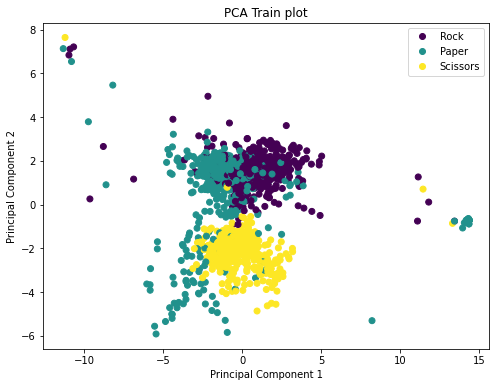

In [447]:
classes = ['Rock', 'Paper', 'Scissors']
plt.figure(figsize=(8,6))
plt.scatter(train_pca_df.values[:,0], train_pca_df.values[:,1], c = train_num_class)

plt.title("PCA Train plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

#### Graficar componentes principales para dataset de validación

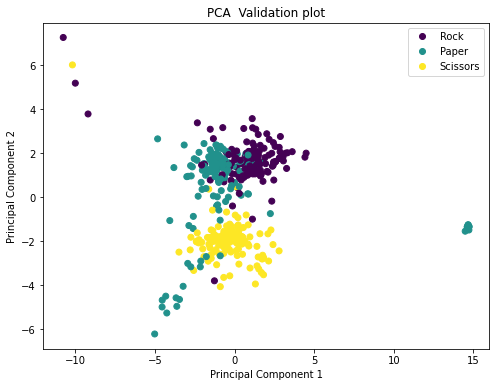

In [448]:
classes = ['Rock', 'Paper', 'Scissors']
plt.figure(figsize=(8,6))
plt.scatter(val_pca_df.values[:,0], val_pca_df.values[:,1], c = val_num_class)

plt.title("PCA  Validation plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

#### Graficar componentes principales para dataset de testeo

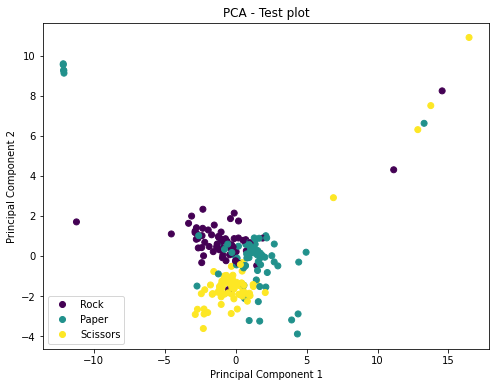

In [449]:
classes = ['Rock', 'Paper', 'Scissors']
plt.figure(figsize=(8,6))
plt.scatter(test_pca_df.values[:,0], test_pca_df.values[:,1], c = test_num_class)

plt.title("PCA - Test plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

**Análisis:** Se observa que en los 3 conjuntos de características: Entrenamiento, validación y testeo, se presenta una diferenciación adecuada entre las regiones de las diferentes clases, obviamente, con algunas excepciones. Esto es un buen indicio de que se pueden aplicar algoritmos de clasificación sobre estos datasets.

### Selección de características
Se comparan las diferentes características para ver si alguna de ellas, o alguna combinación de ellas, logra separar las clases de una manera más clara:

In [343]:
features

['y_centroid',
 'x_centroid',
 'perimeter',
 'area',
 'area_to_convex_ratio',
 'compacity',
 'area2_perimeter',
 'area2',
 'perimeter2',
 'mayor_menor',
 'menor_mayor',
 'area_perimeter_ratio',
 'extent',
 'min_row',
 'min_col',
 'max_row',
 'max_col',
 'max_min_col',
 'polygon_count',
 'perimeter_polygonCount']

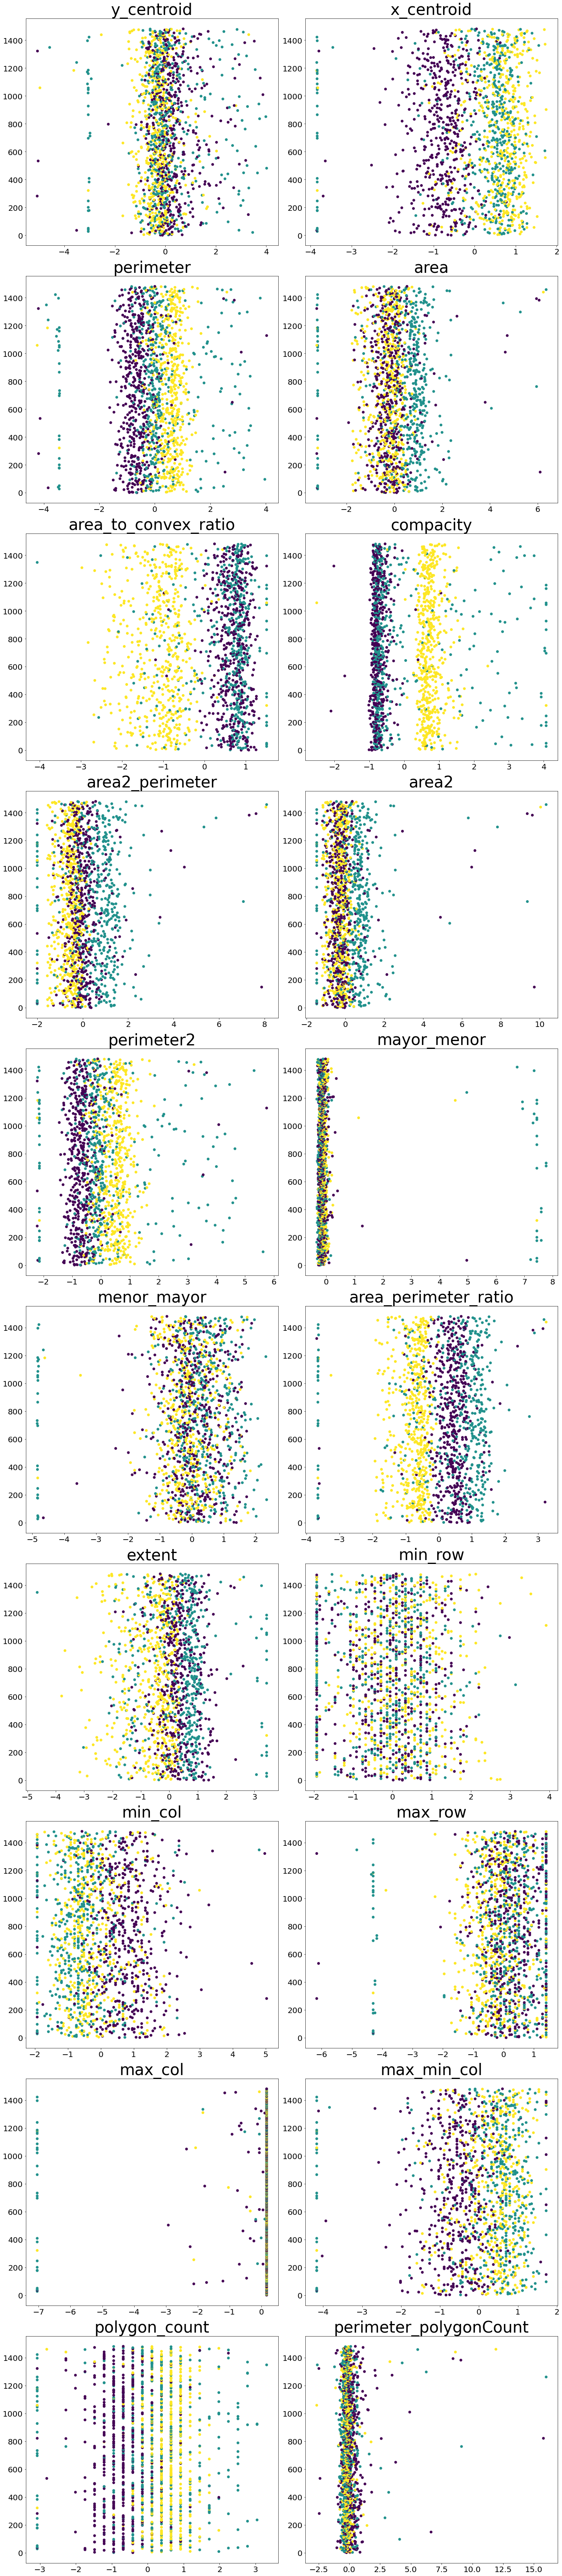

In [404]:
fig1 = plt.figure(1,figsize=(20, 100))
cols = 2
rows = (len(features)//2)+1

for i, feature in enumerate(features):
    fig1.add_subplot(rows, cols, i+1)
    plt.title(feature, fontsize=40)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.scatter(X_train[feature].values, np.arange(0, len(X_train)), c = train_num_class)

plt.tight_layout()

A partir de la dispersión en cada una de las características y mostrada en los gráficos anteriores, se decide trabajar con las características que se cree que generan una mejor separación de las clases. Estas características son:

In [345]:
sel_features = ['x_centroid', 'area_perimeter_ratio', 'compacity', 'min_col']

In [346]:
prueba_train = pd.DataFrame(X_train[sel_features])
prueba_train.head(5)

x_centroid  area_perimeter_ratio  compacity   min_col
0   -0.572989              0.875585  -0.925443  0.562734
1   -0.956741              0.547799  -0.936372  1.185270
2   -0.273371              0.147293  -0.642669  0.732517
3   -0.652819              0.926268  -1.007764  1.072082
4    0.562506             -0.890871   0.785586 -0.059802

Observemos cómo sería la dispersión de las clases si se tomaran únicamente estas características. Nuevamente se utiliza el método PCA, únicamente sobre las características seleccionadas:

In [347]:
prueba_train_pca = PCA(n_components=2)
prueba_train_pca_result = prueba_train_pca.fit_transform(prueba_train)
prueba_train_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

prueba_train_pca_df['pca1'] = prueba_train_pca_result[:,0]
prueba_train_pca_df['pca2'] = prueba_train_pca_result[:,1]
varianza=(prueba_train_pca.explained_variance_ratio_)*100


print('Porcentaje de los datos explicados por cada componente principal: {}'.format(varianza))
print('Porcentaje total de los datos explicados por las componentes principales: ' + repr(sum(varianza)))
print('Porcentaje de información perdida: ' + repr(100-sum(varianza)))
prueba_train_pca_df.head(5)

Porcentaje de los datos explicados por cada componente principal: [46.09841819 42.47741873]
Porcentaje total de los datos explicados por las componentes principales: 88.57583692127585
Porcentaje de información perdida: 11.424163078724149


pca1      pca2
0 -0.979172  1.105761
1 -0.580509  1.771629
2 -0.358648  0.920947
3 -0.998289  1.540189
4  0.949762 -0.697707

In [436]:
Y_train

class
0         rock
1         rock
2        paper
3         rock
4     scissors
...        ...
1526     paper
1527     paper
1528  scissors
1529     paper
1530      rock

[1482 rows x 1 columns]

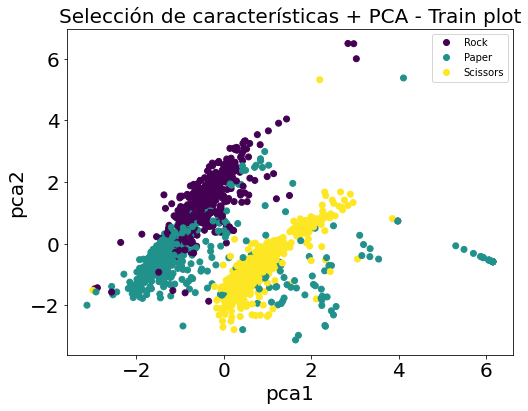

In [443]:
classes = ['Rock', 'Paper', 'Scissors']
plt.figure(figsize=(8,6))
scatter = plt.scatter(prueba_train_pca_df['pca1'].values, prueba_train_pca_df['pca2'].values, c = train_num_class)

plt.title("Selección de características + PCA - Train plot", fontsize=20)
plt.xlabel(prueba_train_pca_df.columns[0], fontsize=20)
plt.ylabel(prueba_train_pca_df.columns[1], fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

De igual forma, se aplica esta selección de características sobre los datasets de validación y testeo, además de observar la dispersión de las clases usando el PCA nuevamente:

#### **Dataset de validación:**

In [349]:
prueba_val = pd.DataFrame(X_val[sel_features])
prueba_val.head(5)

x_centroid  area_perimeter_ratio  compacity   min_col
0   -3.838014             -3.652995   4.072107 -1.927410
1    0.847048             -0.737230   0.623558 -0.342773
2   -0.681226              0.532759  -0.846401  0.789111
3   -0.430482              0.736000  -0.896587  0.562734
4    0.681489             -0.570622   0.626621 -0.399367

In [350]:
prueba_val_pca = PCA(n_components=2)
prueba_val_pca_result = prueba_val_pca.fit_transform(prueba_val)
prueba_val_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

prueba_val_pca_df['pca1'] = prueba_val_pca_result[:,0]
prueba_val_pca_df['pca2'] = prueba_val_pca_result[:,1]
varianza=(prueba_val_pca.explained_variance_ratio_)*100


print('Porcentaje de los datos explicados por cada componente principal: {}'.format(varianza))
print('Porcentaje total de los datos explicados por las componentes principales: ' + repr(sum(varianza)))
print('Porcentaje de información perdida: ' + repr(100-sum(varianza)))
prueba_val_pca_df.head(5)

Porcentaje de los datos explicados por cada componente principal: [48.29967155 40.81259771]
Porcentaje total de los datos explicados por las componentes principales: 89.11226925620313
Porcentaje de información perdida: 10.887730743796865


pca1      pca2
0  6.187048  1.208107
1  0.878434 -0.689392
2 -0.915461  1.225951
3 -1.103787  0.878190
4  0.797977 -0.638633

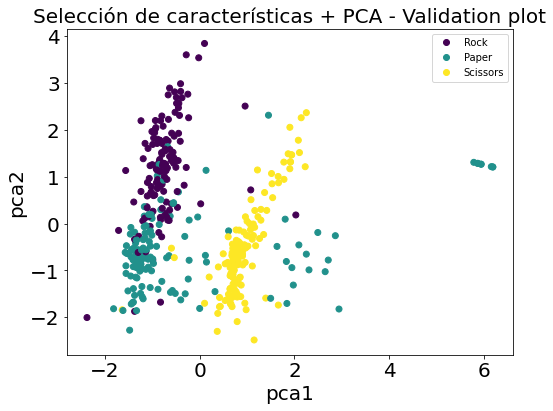

In [444]:
classes = ['Rock', 'Paper', 'Scissors']
plt.figure(figsize=(8,6))
plt.scatter(prueba_val_pca_df['pca1'].values, prueba_val_pca_df['pca2'].values, c = val_num_class)

plt.title("Selección de características + PCA - Validation plot", fontsize=20)
plt.xlabel(prueba_val_pca_df.columns[0], fontsize=20)
plt.ylabel(prueba_val_pca_df.columns[1], fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

#### **Dataset de Testeo:**

In [352]:
prueba_test = pd.DataFrame(X_test[sel_features])
prueba_test.head(5)

x_centroid  area_perimeter_ratio  compacity   min_col
0   -0.150044             -1.421442   1.092497  1.015488
1   -0.509563              1.039422  -0.826298  0.279763
2    0.604974             -0.668061   0.557502 -0.229585
3   -3.840625             -3.643129   3.225769 -1.927410
4    0.359693             -0.711149   0.532927  0.053386

In [353]:
prueba_test_pca = PCA(n_components=2)
prueba_test_pca_result = prueba_test_pca.fit_transform(prueba_test)
prueba_test_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

prueba_test_pca_df['pca1'] = prueba_test_pca_result[:,0]
prueba_test_pca_df['pca2'] = prueba_test_pca_result[:,1]
varianza=(prueba_test_pca.explained_variance_ratio_)*100


print('Porcentaje de los datos explicados por cada componente principal: {}'.format(varianza))
print('Porcentaje total de los datos explicados por las componentes principales: ' + repr(sum(varianza)))
print('Porcentaje de información perdida: ' + repr(100-sum(varianza)))
prueba_test_pca_df.head(5)

Porcentaje de los datos explicados por cada componente principal: [47.04092026 39.95836523]
Porcentaje total de los datos explicados por las componentes principales: 86.99928549309615
Porcentaje de información perdida: 13.000714506903847


pca1      pca2
0  1.861453  0.014770
1 -0.808213  1.142649
2  0.436462 -0.773901
3  5.496644 -1.680591
4  0.633229 -0.458879

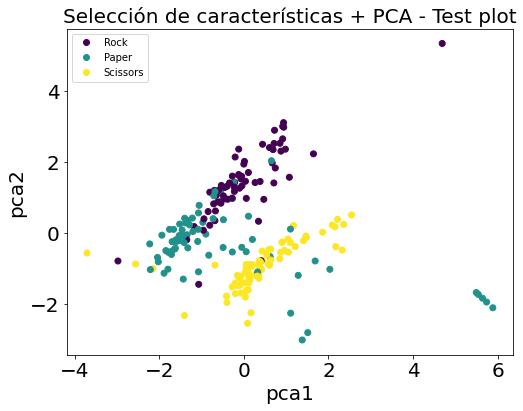

In [446]:
classes = ['Rock', 'Paper', 'Scissors']
plt.figure(figsize=(8,6))
plt.scatter(prueba_test_pca_df['pca1'].values, prueba_test_pca_df['pca2'].values, c = test_num_class)

plt.title("Selección de características + PCA - Test plot", fontsize=20)
plt.xlabel(prueba_test_pca_df.columns[0], fontsize=20)
plt.ylabel(prueba_test_pca_df.columns[1], fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

**Análisis:** Se observa que con las características seleccionadas, se presenta una clara separación entre las diferentes clases, para cada uno de los datasets: Entrenamiento, Validación y Testeo.

## **8. Reconocimiento de patrones**
Una vez se tiene un conjunto de características refinado, se procede a entrenar modelos de clasificación para predecir nuevas entradas. En este caso, se toma como nuevas entradas al dataset de validación. Al final de cada modelo, se presenta la matriz de confusión y se muestran algunas de las predicciones realizadas sobre el dataset de validación. Cabe mencionar que los modelos se entrenan con las características seleccionadas, sin realizar el método del PCA, el cual se aplicó únicamente para fines de graficación y visualización.

Se importan algunas librerías para generar la matriz de confusión y métricas:

In [355]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

Función para mostrar algunas de las predicciones realizadas por el modelo sobre el dataset de validación:

In [356]:
def show_pred(preds, idxs):
    plt.figure(figsize=(30, 20))
    plt.suptitle("Predictions", fontsize=40)
    diff_s = math.sqrt(idxs[1] - idxs[0])
    for img_idx in range(idxs[0], idxs[1]):
        plt.subplot(diff_s, diff_s, img_idx + 1)
        plt.title(f"Pred: {preds[img_idx]}")
        plt.imshow(validationImages[img_idx], cmap="gray")
    plt.show()

### KNN

In [357]:
# Usando conjunto con caracteristicas aplanadas
knn_model = KNeighborsClassifier(n_jobs=-1)
knn_model.fit(prueba_train, Y_train)
acc = knn_model.score(prueba_val.values, Y_val.values.ravel())
print("Precisión del modelo KNN: {:.2f}%".format(acc * 100))

Precisión del modelo KNN: 96.67%


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [358]:
pred_knn = knn_model.predict(prueba_val)

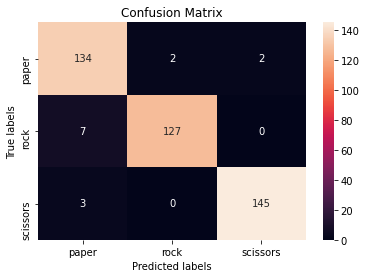

In [359]:
import seaborn as sns  
cm = confusion_matrix(Y_val.values.ravel(), knn_model.predict(prueba_val))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['paper', 'rock', 'scissors']); ax.yaxis.set_ticklabels(['paper', 'rock', 'scissors']);

<ipython-input-356-1a324d051813>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


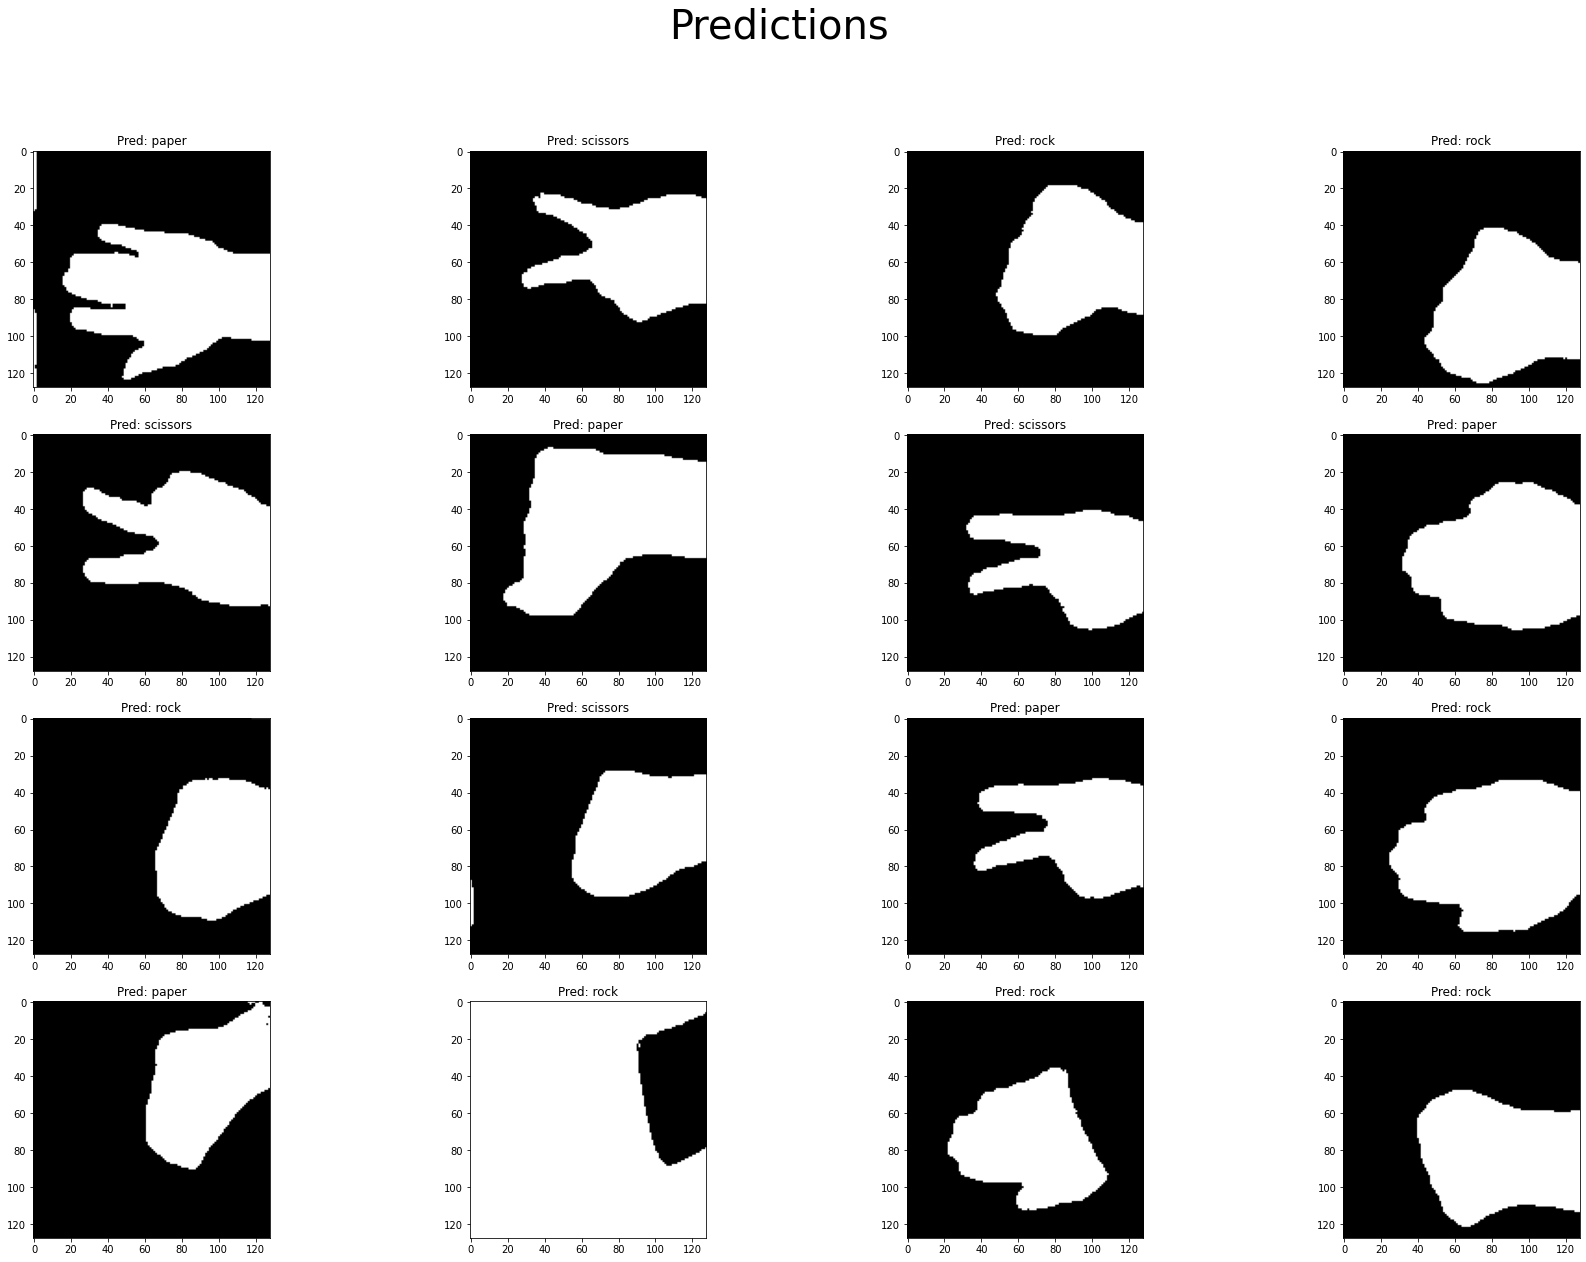

In [360]:
show_pred(pred_knn, (0, 16))

### Random Forest

In [361]:
from sklearn.ensemble import RandomForestClassifier
# Creamos el arbol aleatorio
random_forest_model_0 = RandomForestClassifier(n_estimators = 210, random_state = SEED)
random_forest_model_0.fit(prueba_train, Y_train)

# Calculamos el score
acc = random_forest_model_0.score(prueba_val, Y_val)
print("Precisión del modelo: {:.2f}%".format(acc * 100))

<ipython-input-361-8b5a0f563c01>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model_0.fit(prueba_train, Y_train)


Precisión del modelo: 95.24%


In [362]:
pred_forest = random_forest_model_0.predict(prueba_val)

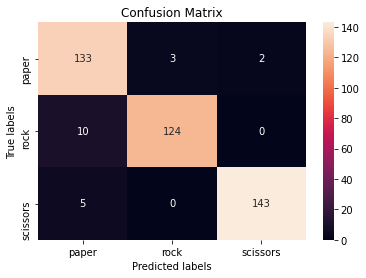

In [363]:
import seaborn as sns  
cm = confusion_matrix(Y_val.values.ravel(), random_forest_model_0.predict(prueba_val))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['paper', 'rock', 'scissors']); ax.yaxis.set_ticklabels(['paper', 'rock', 'scissors']);

<ipython-input-356-1a324d051813>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


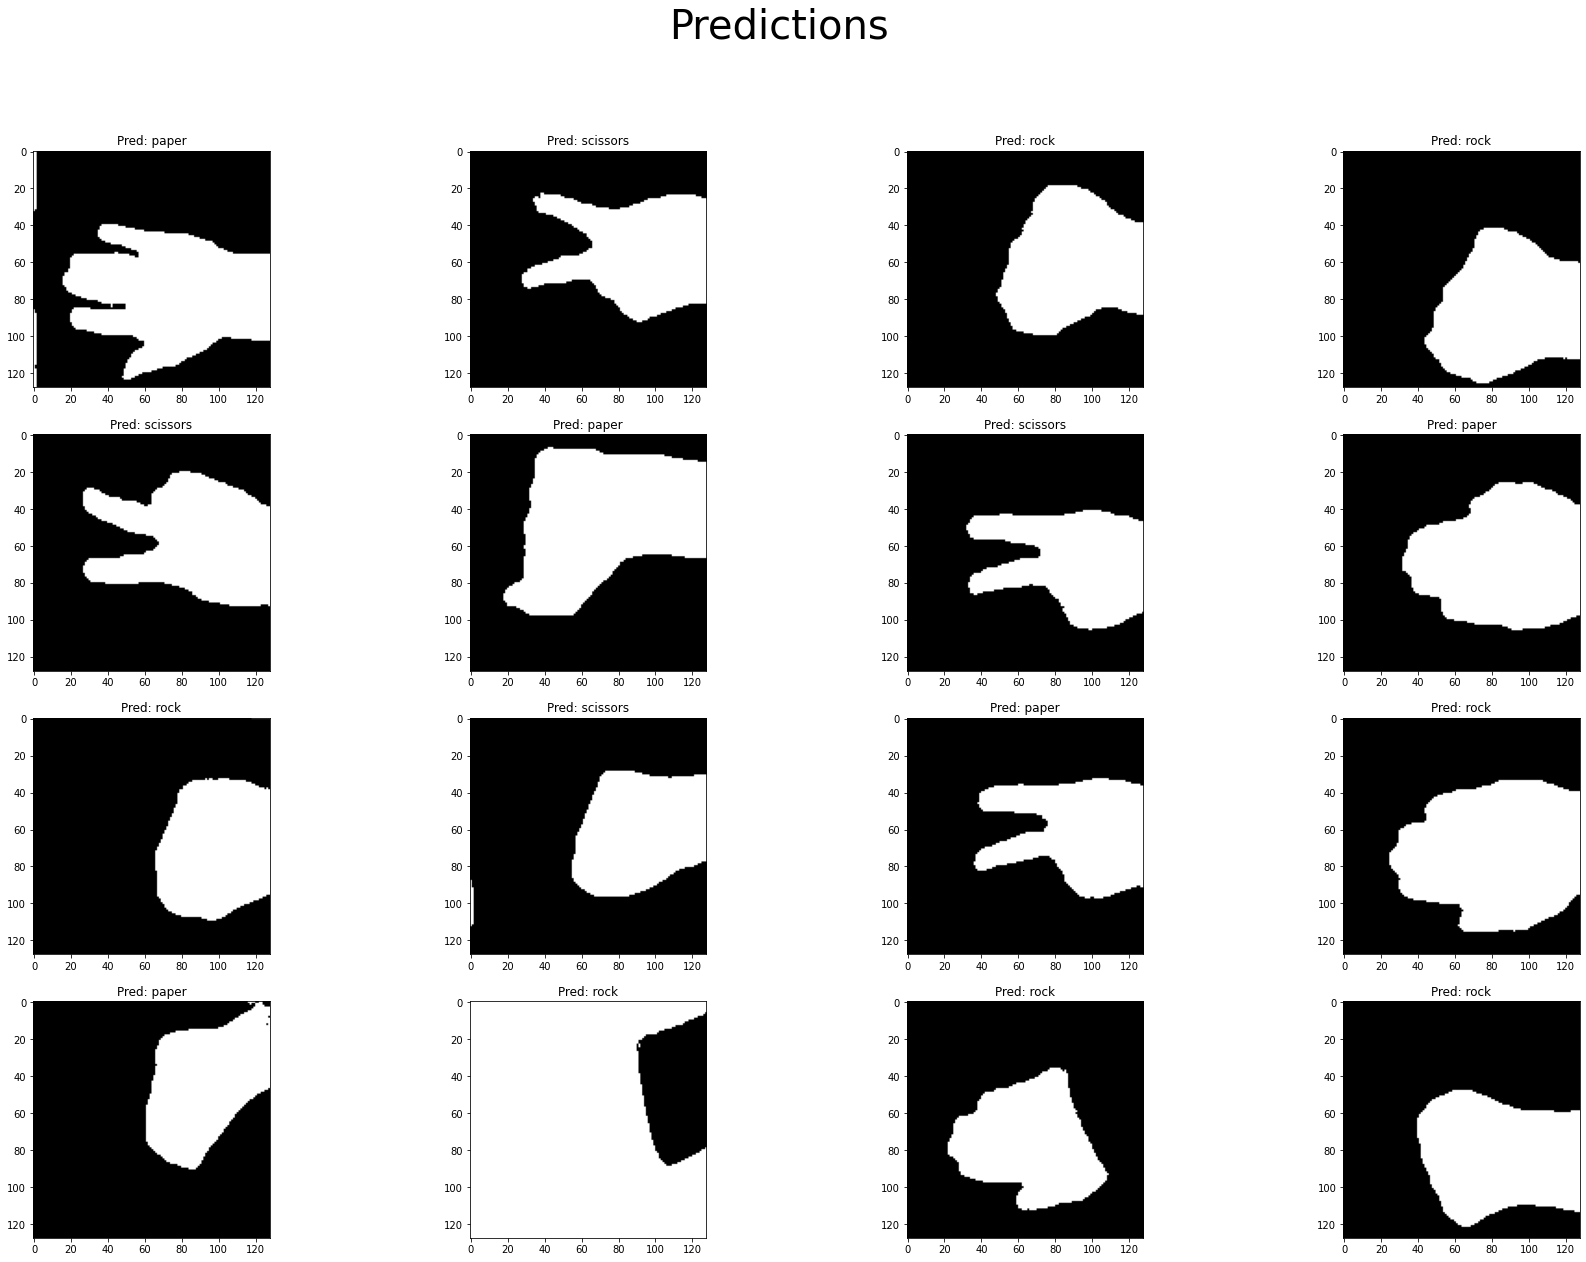

In [364]:
show_pred(pred_forest, (0, 16))

### SVC

In [365]:
from sklearn.svm import SVC
svc_model_0 = SVC()
svc_model_0.fit(prueba_train, Y_train)

# Calculamos el score
acc = svc_model_0.score(prueba_val, Y_val)
print("Precisión del modelo: {:.2f}%".format(acc * 100))

Precisión del modelo: 97.62%


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [366]:
pred_svc = svc_model_0.predict(prueba_val)

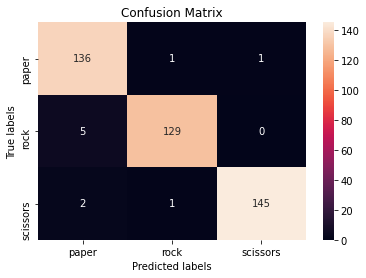

In [367]:
import seaborn as sns  
cm = confusion_matrix(Y_val.values.ravel(), svc_model_0.predict(prueba_val))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['paper', 'rock', 'scissors']); ax.yaxis.set_ticklabels(['paper', 'rock', 'scissors']);

<ipython-input-356-1a324d051813>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


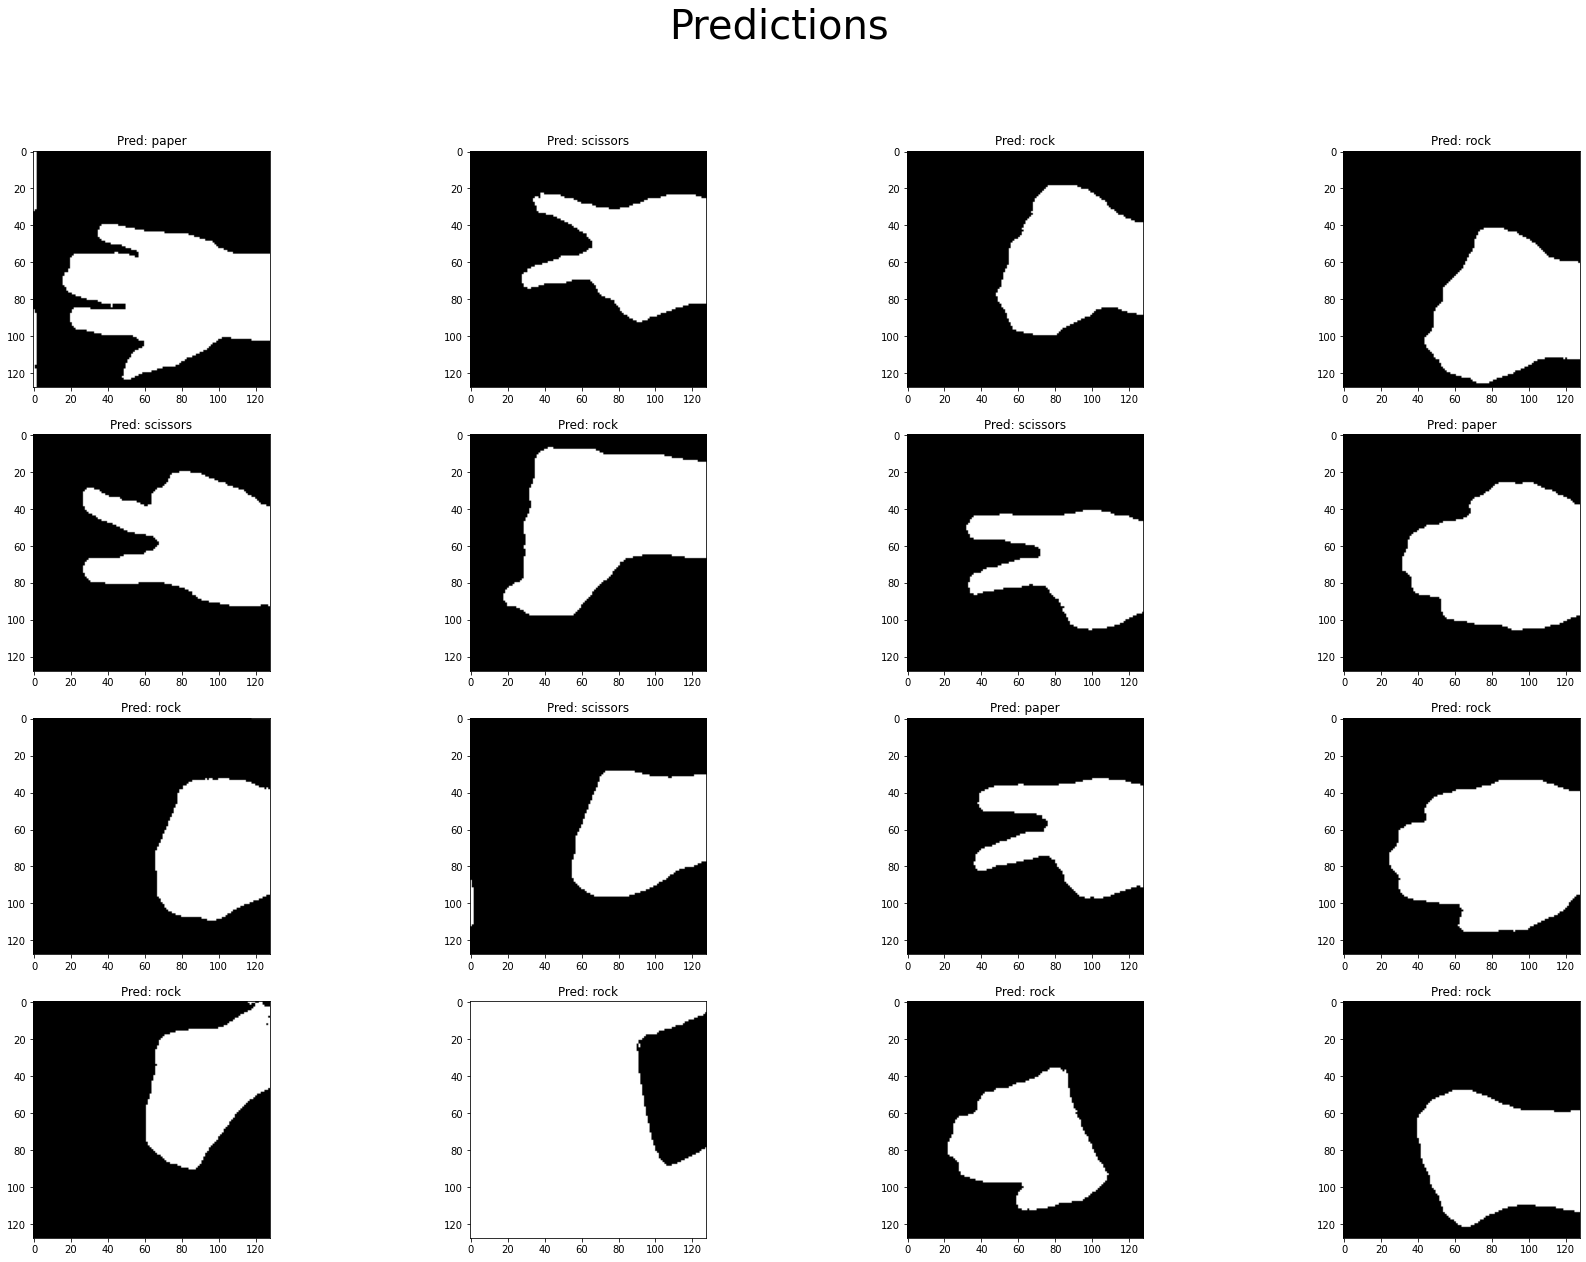

In [368]:
show_pred(pred_svc, (0, 16))

---

## HyperParameter Tunning

Se busca tunnear los hiperparámetros de los modelos realizados por medio de un algoritmo GridSearch. Una vez se conocen los mejores hiperparámetros, se evalúa la eficiencia del modelo usando el **dataset de testeo**. A continuación se muestran los resultados:

Readaptamos la función para mostrar predicciones sobre el **dataset de testeo:**

In [369]:
def show_pred(preds, idxs):
    plt.figure(figsize=(30, 20))
    plt.suptitle("Predictions", fontsize=40)
    diff_s = math.sqrt(idxs[1] - idxs[0])
    for img_idx in range(idxs[0], idxs[1]):
        plt.subplot(diff_s, diff_s, img_idx + 1)
        plt.title(f"Pred: {preds[img_idx]}")
        plt.imshow(testImages[img_idx], cmap="gray")
    plt.show()

## KNN

Instaciamos un nuevo modelo de KNN:

In [370]:
knn_model2 = KNeighborsClassifier(n_jobs=-1)

Llamar los hiperparámetros a tener en cuenta, con sus posibles valores:

In [371]:
# Number of neighbors to use
n_neighbors = [int(x) for x in np.linspace(start = 2, stop = 20, num=19)]
# Leaf size passed to BallTree or KDTree
leaf_size = [int(x) for x in np.linspace(start = 20, stop = 40, num=5)]
# Algorithm used to compute the nearest neighbors
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# Weight function used in prediction
weights = ['uniform', 'distance']

In [372]:
#Parameter Grid
param_grid = {'n_neighbors': n_neighbors,
              'leaf_size': leaf_size,
              'algorithm': algorithm,
              'weights': weights
             }
print(param_grid)

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'leaf_size': [20, 25, 30, 35, 40], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}


Generar y entrenar modelo GridSearch:

In [272]:
knn_Grid = GridSearchCV(estimator = knn_model2, param_grid=param_grid,cv=3,verbose=2, n_jobs=4)

In [273]:
knn_Grid.fit(prueba_train, Y_train)

Fitting 3 folds for each of 760 candidates, totalling 2280 fits


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=4,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 25, 30, 35, 40],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [274]:
knn_Grid.best_params_

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 2, 'weights': 'uniform'}

Re-entrenar con los mejores hiperparámetros encontrados:

In [373]:
# Usando conjunto con caracteristicas aplanadas
knn_model2 = KNeighborsClassifier(algorithm ='auto', leaf_size=20, n_neighbors= 5, weights='uniform', n_jobs=-1)
knn_model2.fit(prueba_train, Y_train)
acc = knn_model2.score(prueba_test.values, Y_test.values.ravel())
print("Precisión del modelo KNN: {:.2f}%".format(acc * 100))

Precisión del modelo KNN: 93.40%


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [374]:
pred_knn2 = knn_model2.predict(prueba_test)

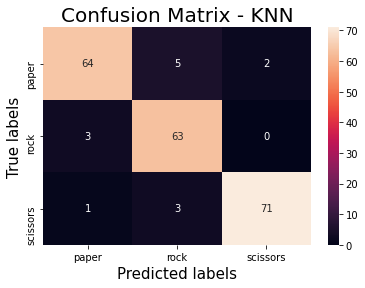

In [420]:
import seaborn as sns  
cm = confusion_matrix(Y_test.values.ravel(), knn_model2.predict(prueba_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15);
ax.set_ylabel('True labels', fontsize=15); 
ax.set_title('Confusion Matrix - KNN', fontsize=20); 
ax.xaxis.set_ticklabels(['paper', 'rock', 'scissors'], fontsize=10);
ax.yaxis.set_ticklabels(['paper', 'rock', 'scissors'], fontsize=10);

## Métricas KNN sobre dataset de testeo

In [376]:
knn_acc = accuracy_score(Y_test.values.ravel(), pred_knn2)
knn_rec = recall_score(Y_test.values.ravel(), pred_knn2, average=None)
knn_pr = precision_score(Y_test.values.ravel(), pred_knn2, average=None)
knn_f1 = f1_score(Y_test.values.ravel(), pred_knn2, average=None)
print('KNN Model:')
print('Accuracy: ' + repr(knn_acc))
print('Recall: Paper: ' + repr(knn_rec[0]) + ', Rock: ' + repr(knn_rec[1]) + ', Scissors: ' + repr(knn_rec[2]))
print('Precision: Paper: ' + repr(knn_pr[0]) + ', Rock: ' + repr(knn_pr[1]) + ', Scissors: ' + repr(knn_rec[2]))
print('F1 Score: Paper: ' + repr(knn_f1[0]) + ', Rock: ' + repr(knn_f1[1]) + ', Scissors: ' + repr(knn_rec[2]))

KNN Model:
Accuracy: 0.9339622641509434
Recall: Paper: 0.9014084507042254, Rock: 0.9545454545454546, Scissors: 0.9466666666666667
Precision: Paper: 0.9411764705882353, Rock: 0.8873239436619719, Scissors: 0.9466666666666667
F1 Score: Paper: 0.920863309352518, Rock: 0.9197080291970803, Scissors: 0.9466666666666667


<ipython-input-369-7f6ddbb24639>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


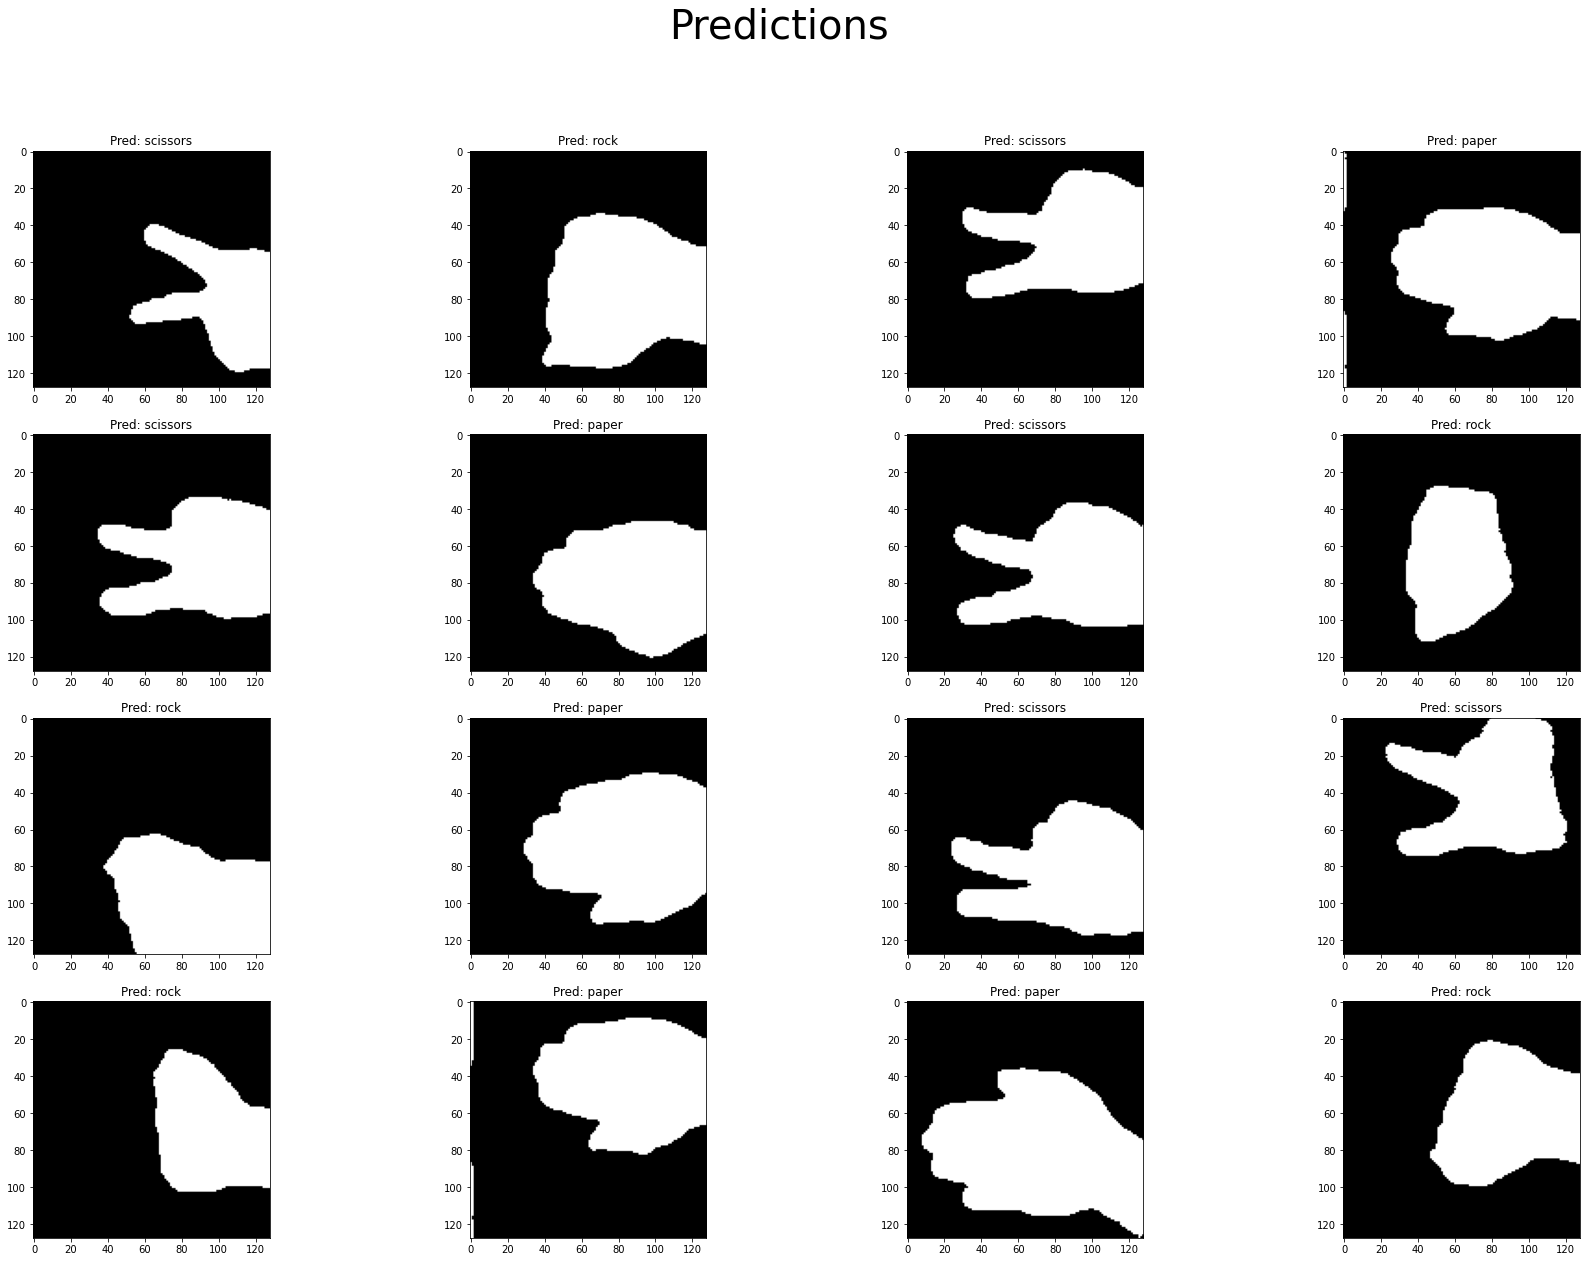

In [377]:
show_pred(pred_knn2, (0, 16))

## Random Forest

Instaciamos un nuevo modelo de RandomForest:

In [378]:
random_forest_model_1 = RandomForestClassifier()

Llamar los hiperparámetros a tener en cuenta, con sus posibles valores:

In [379]:
# Numero de arboles en el random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num=30)]

In [380]:
#Parameter Grid
param_grid = {'n_estimators': n_estimators,
             }
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]}


Generar y entrenar modelo GridSearch:

In [339]:
rf_Grid = GridSearchCV(estimator = random_forest_model_1, param_grid=param_grid,cv=3,verbose=2, n_jobs=4)

In [340]:
rf_Grid.fit(prueba_train, Y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=80), n_jobs=4,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300]},
             verbose=2)

In [341]:
rf_Grid.best_params_

{'n_estimators': 130}

Re-entrenar con los mejores hiperparámetros encontrados:

In [381]:
from sklearn.ensemble import RandomForestClassifier
# Creamos el arbol aleatorio
random_forest_model_1 = RandomForestClassifier(n_estimators = 130, random_state = SEED)
random_forest_model_1.fit(prueba_train, Y_train)

# Calculamos el score
acc = random_forest_model_1.score(prueba_test, Y_test)
print("Precisión del modelo: {:.2f}%".format(acc * 100))

<ipython-input-381-19e97ee26eea>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model_1.fit(prueba_train, Y_train)


Precisión del modelo: 91.98%


In [382]:
pred_rf2 = random_forest_model_1.predict(prueba_test)

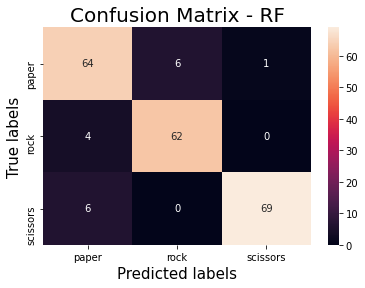

In [422]:
import seaborn as sns  
cm = confusion_matrix(Y_test.values.ravel(), random_forest_model_1.predict(prueba_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15);
ax.set_ylabel('True labels', fontsize=15); 
ax.set_title('Confusion Matrix - RF', fontsize=20); 
ax.xaxis.set_ticklabels(['paper', 'rock', 'scissors'], fontsize=10);
ax.yaxis.set_ticklabels(['paper', 'rock', 'scissors'], fontsize=10);

## Métricas RandomForest sobre dataset de Testeo

In [384]:
rf_acc = accuracy_score(Y_test.values.ravel(), pred_rf2)
rf_rec = recall_score(Y_test.values.ravel(), pred_rf2, average=None)
rf_pr = precision_score(Y_test.values.ravel(), pred_rf2, average=None)
rf_f1 = f1_score(Y_test.values.ravel(), pred_rf2, average=None)
print('RandomForest Model:')
print('Accuracy: ' + repr(rf_acc))
print('Recall: Paper: ' + repr(rf_rec[0]) + ', Rock: ' + repr(rf_rec[1]) + ', Scissors: ' + repr(rf_rec[2]))
print('Precision: Paper: ' + repr(rf_pr[0]) + ', Rock: ' + repr(rf_pr[1]) + ', Scissors: ' + repr(rf_rec[2]))
print('F1 Score: Paper: ' + repr(rf_f1[0]) + ', Rock: ' + repr(rf_f1[1]) + ', Scissors: ' + repr(rf_rec[2]))

RandomForest Model:
Accuracy: 0.9198113207547169
Recall: Paper: 0.9014084507042254, Rock: 0.9393939393939394, Scissors: 0.92
Precision: Paper: 0.8648648648648649, Rock: 0.9117647058823529, Scissors: 0.92
F1 Score: Paper: 0.8827586206896552, Rock: 0.9253731343283583, Scissors: 0.92


<ipython-input-369-7f6ddbb24639>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


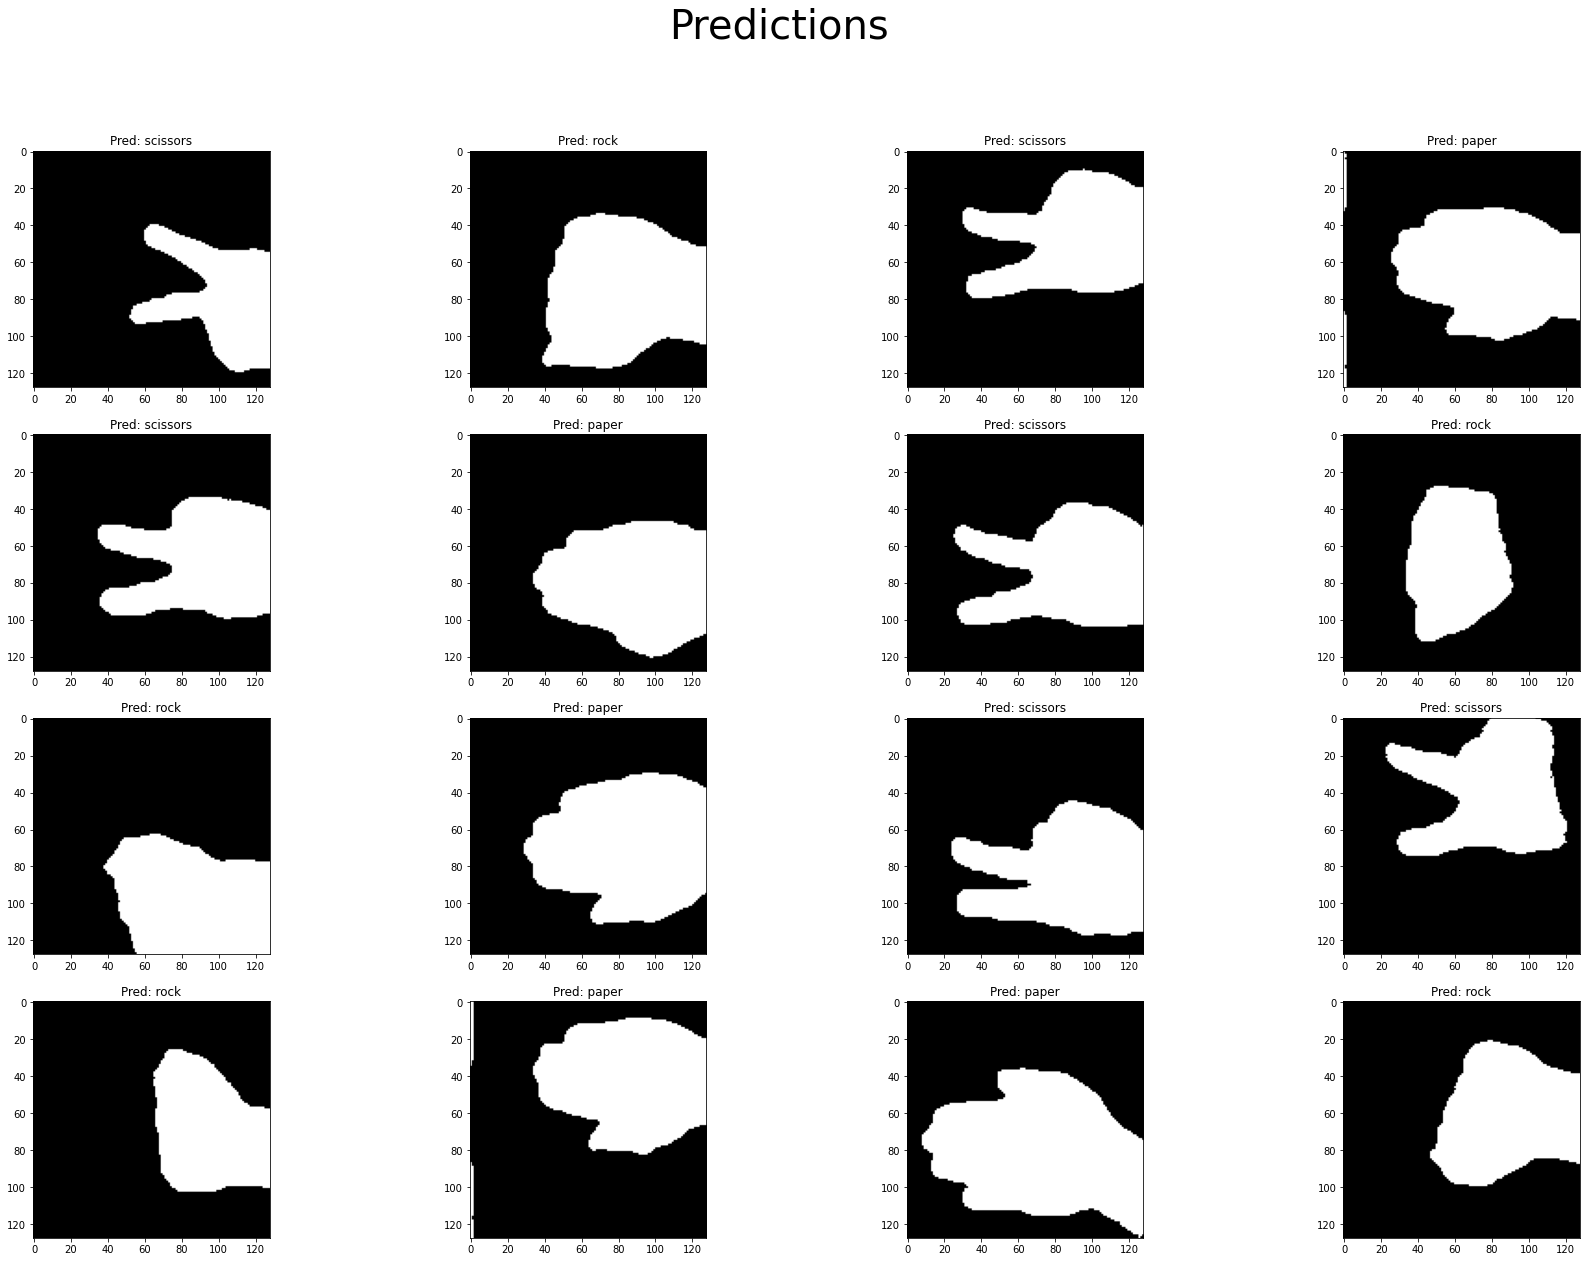

In [385]:
show_pred(pred_rf2, (0, 16))

## SVC

Instaciamos un nuevo modelo de SVC:

In [386]:
svc_model_1 = SVC()

Llamar los hiperparámetros a tener en cuenta, con sus posibles valores:

In [387]:
# Regularization parameter
C = [1, 5, 10, 20, 40, 50, 100, 1000]
# Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
gamma = ['scale', 'auto']

In [388]:
#Parameter Grid
param_grid = {'C': C,
              'gamma': gamma,
              }
print(param_grid)

{'C': [1, 5, 10, 20, 40, 50, 100, 1000], 'gamma': ['scale', 'auto']}


Generar y entrenar modelo GridSearch:

In [389]:
svc_Grid = GridSearchCV(estimator = svc_model_1, param_grid=param_grid,cv=3,verbose=2, n_jobs=4)

In [375]:
svc_Grid.fit(prueba_train, Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 5, 10, 20, 40, 50, 100, 1000],
                         'gamma': ['scale', 'auto']},
             verbose=2)

In [385]:
svc_Grid.best_params_

{'C': 100, 'gamma': 'scale'}

Re-entrenar con los mejores hiperparámetros encontrados:

In [390]:
from sklearn.svm import SVC
svc_model_1 = SVC(C=1, gamma='scale')
svc_model_1.fit(prueba_train, Y_train)

# Calculamos el score
acc = svc_model_1.score(prueba_test, Y_test)
print("Precisión del modelo: {:.2f}%".format(acc * 100))

Precisión del modelo: 92.45%


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [391]:
pred_svc2 = svc_model_1.predict(prueba_test)

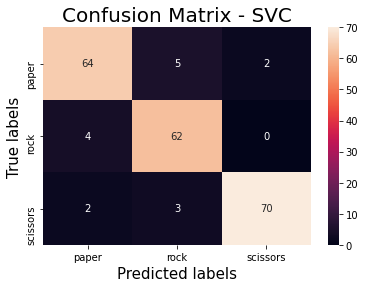

In [423]:
import seaborn as sns  
cm = confusion_matrix(Y_test.values.ravel(), svc_model_1.predict(prueba_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15);
ax.set_ylabel('True labels', fontsize=15); 
ax.set_title('Confusion Matrix - SVC', fontsize=20); 
ax.xaxis.set_ticklabels(['paper', 'rock', 'scissors'], fontsize=10);
ax.yaxis.set_ticklabels(['paper', 'rock', 'scissors'], fontsize=10);

## Métricas SVC sobre dataset de testeo

In [393]:
svc_acc = accuracy_score(Y_test.values.ravel(), pred_svc2)
svc_rec = recall_score(Y_test.values.ravel(), pred_svc2, average=None)
svc_pr = precision_score(Y_test.values.ravel(), pred_svc2, average=None)
svc_f1 = f1_score(Y_test.values.ravel(), pred_svc2, average=None)
print('SVC Model:')
print('Accuracy: ' + repr(svc_acc))
print('Recall: Paper: ' + repr(svc_rec[0]) + ', Rock: ' + repr(svc_rec[1]) + ', Scissors: ' + repr(svc_rec[2]))
print('Precision: Paper: ' + repr(svc_pr[0]) + ', Rock: ' + repr(svc_pr[1]) + ', Scissors: ' + repr(svc_rec[2]))
print('F1 Score: Paper: ' + repr(svc_f1[0]) + ', Rock: ' + repr(svc_f1[1]) + ', Scissors: ' + repr(svc_rec[2]))

SVC Model:
Accuracy: 0.9245283018867925
Recall: Paper: 0.9014084507042254, Rock: 0.9393939393939394, Scissors: 0.9333333333333333
Precision: Paper: 0.9142857142857143, Rock: 0.8857142857142857, Scissors: 0.9333333333333333
F1 Score: Paper: 0.9078014184397163, Rock: 0.9117647058823529, Scissors: 0.9333333333333333


<ipython-input-369-7f6ddbb24639>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


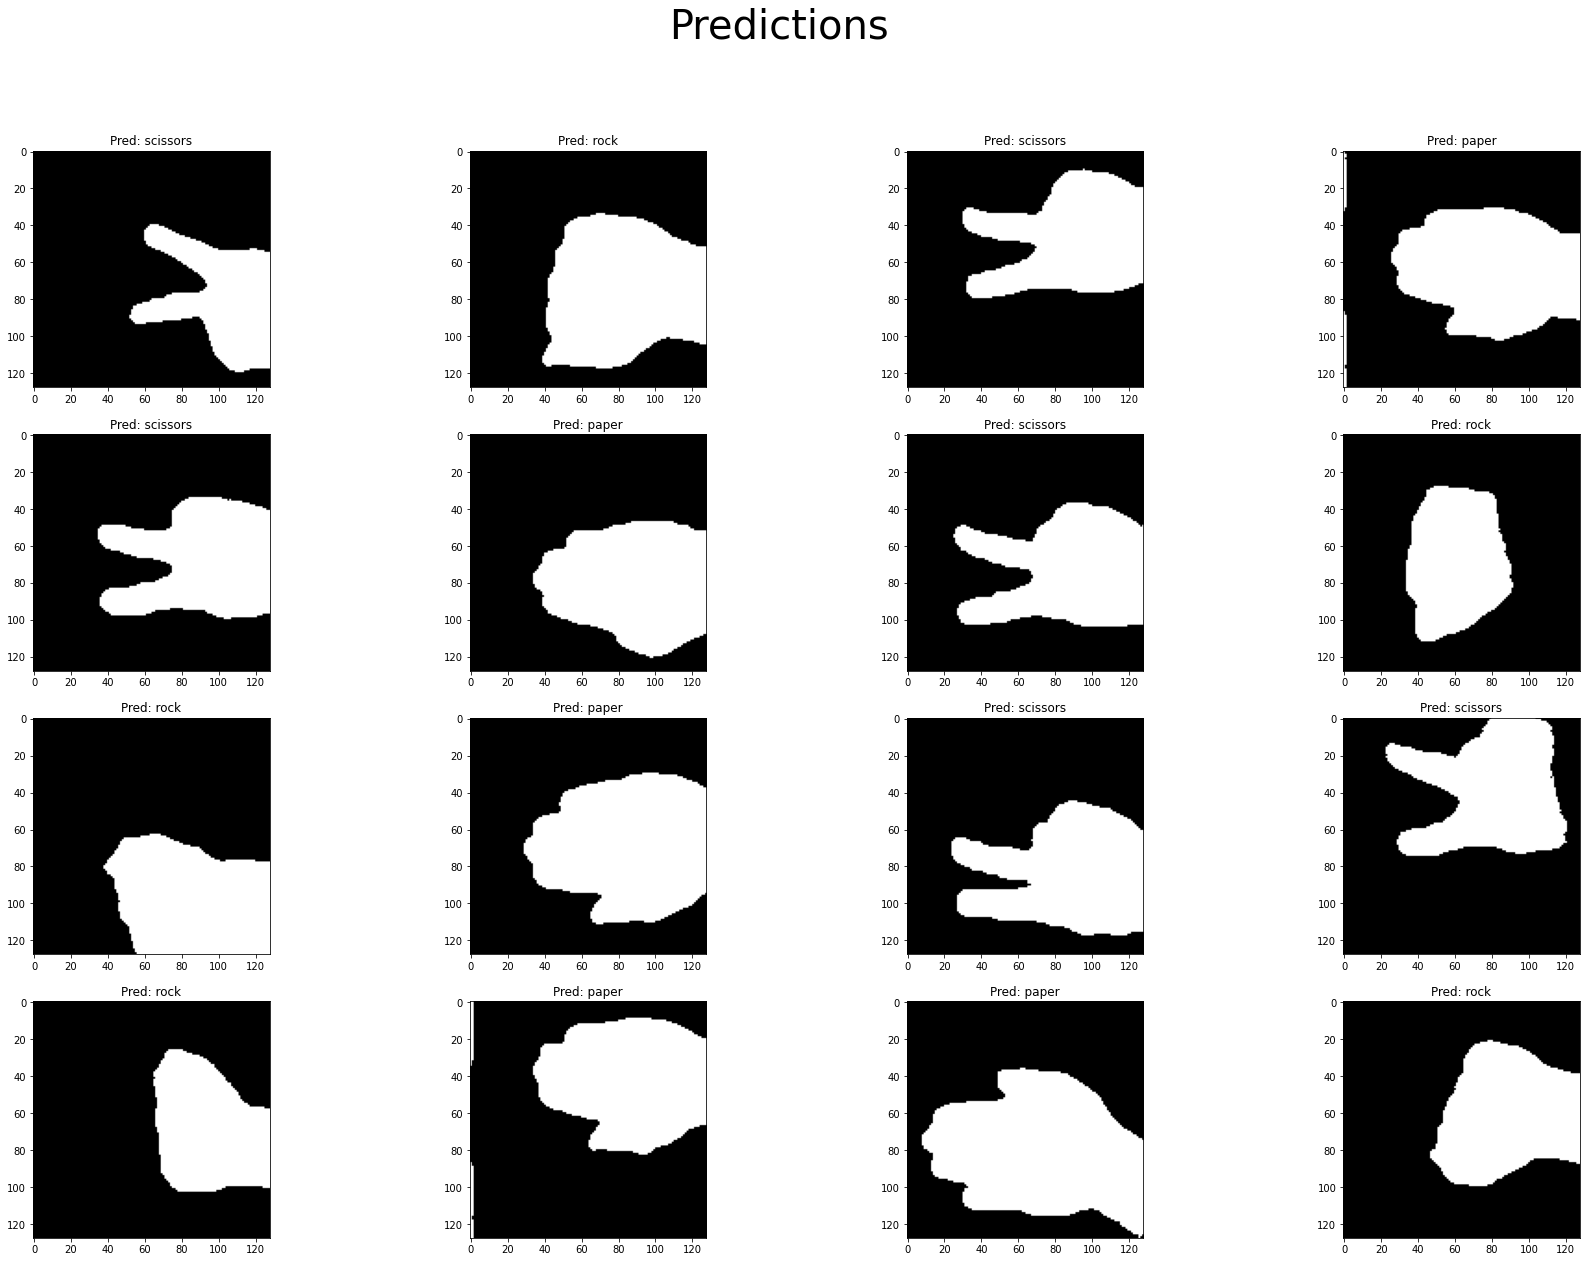

In [394]:
show_pred(pred_svc2, (0, 16))

## **9. Análisis de resultados**
En esta sección se resumen los resultados obtenidos por todos los modelos de Aprendizaje de máquinas y se selecciona el modelo que presente mejores resultados según los requisitos del problema.

En la siguiente gráfica se resumen los resultados obtenidos por cada uno de los métodos implementados y para cada una de las clases: 'Paper', 'Rock', 'Scissors:

In [395]:
knn_paper = [knn_acc, knn_rec[0], knn_pr[0], knn_f1[0]]
rf_paper = [rf_acc, rf_rec[0], rf_pr[0], rf_f1[0]]
svc_paper = [svc_acc, svc_rec[0], svc_pr[0], svc_f1[0]]

In [396]:
knn_rock = [knn_acc, knn_rec[1], knn_pr[1], knn_f1[1]]
rf_rock = [rf_acc, rf_rec[1], rf_pr[1], rf_f1[1]]
svc_rock = [svc_acc, svc_rec[1], svc_pr[1], svc_f1[1]]

In [397]:
knn_scissors = [knn_acc, knn_rec[2], knn_pr[2], knn_f1[2]]
rf_scissors = [rf_acc, rf_rec[2], rf_pr[2], rf_f1[2]]
svc_scissors = [svc_acc, svc_rec[2], svc_pr[2], svc_f1[2]]

In [398]:
knn_res = [knn_paper, knn_rock, knn_scissors]
rf_res = [rf_paper, rf_rock, rf_scissors]
svc_res = [svc_paper, svc_rock, svc_scissors]

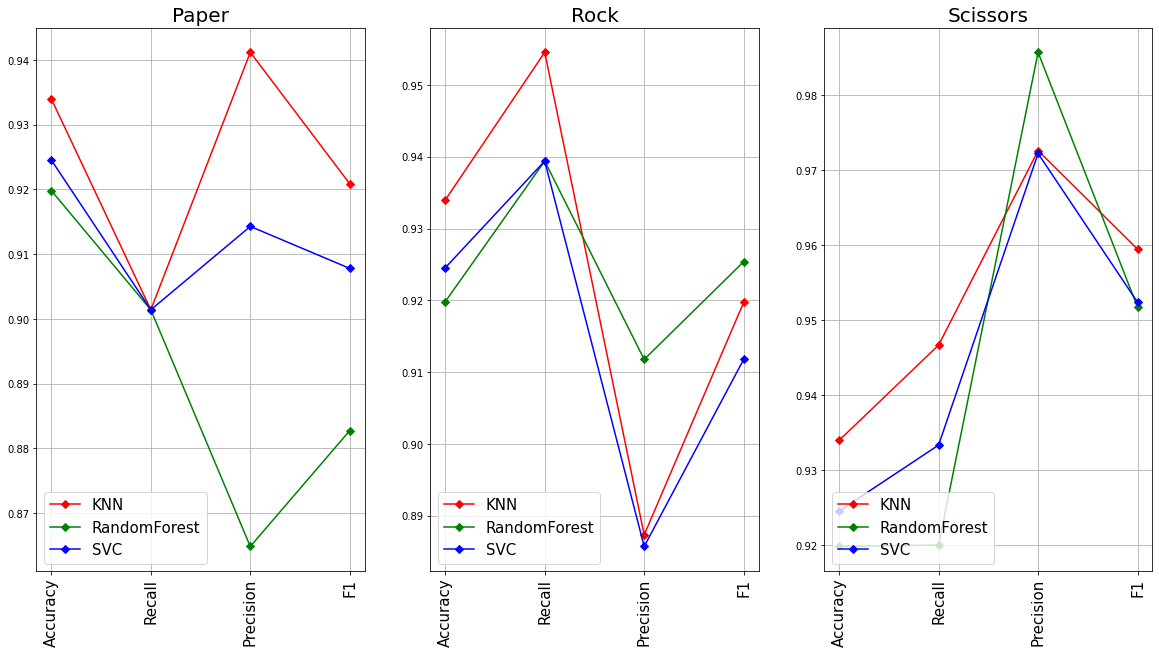

In [455]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3,figsize=(20,10))
x = np.arange(0.5, 1, 0.125)
x_ticks_labels = ['Accuracy','Recall','Precision','F1']
titles = ['Paper', 'Rock', 'Scissors']
for n in range(3):
    y = knn_res[n]
    y2 = rf_res[n]
    y3 = svc_res[n]
    ax[n].set_xticks(x)
    ax[n].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=15)
    ax[n].set_title(titles[n], fontsize=20)
    ax[n].plot(x, y, '-rD', label = 'KNN')
    ax[n].plot(x, y2, '-gD', label = 'RandomForest')
    ax[n].plot(x, y3, '-bD', label = 'SVC')
    ax[n].grid(True)
    ax[n].legend(loc="lower left", fontsize=15)

**Análisis:** Como puede observarse, el algoritmo KNN fue el que mejores métricas presentó, en general, para todas las clases presentes, seguido por el algoritmo SVC y finalmente, por el algoritmo RandomForest.

Por lo tanto, si se necesitara de una selección única de un modelo para este problema, la más adecuada sería el **K-Neighbors - KNN**

## **10. Conclusiones**

* Resúmen de las etapas del proceso de Visión Artificial:

    **1. Adquisición:** Se obtuvo el dataset original y se exploraron todas sus características. Se generaron los subsets de entrenamiento, validación y testeo.
    
    **2. Preprocesamiento:** Se aplicó un reshape a todas las imágenes, un filtro de medianBlur y se extrajo el canal H del espacio HSV.
    
    **3. Segmentación:** Se utilizó la técnica OTSU para segmentar cada una de las imágenes.
    
    **4. Extracción de características:** Se obtuvieron características de forma, relacionadas con el perímetro, el área, longitudes de ejes, centroides, etc.
    
    **5. Selección de características:** Se realizaron pruebas iterativas que permitieron encontrar la combinación de características que alcazaban una mejor clasificación de las imágenes.
    
    **6. Reconocimiento de patrones:** Se entrenaron 3 modelos de Aprendizaje de máquinas con las características seleccionadas, se tunnearon los hiperparámetros y se obtuvieron métricas sobre el dataset de testeo.


* En esta implementación se evidenció notablemente la importancia de la primera etapa de un proceso de visión artificial, la captura de la imagen, pues inicialmente se trabajó con un conjunto de datos bastante heterogéneo, con imágenes que provenían de diferentes fuentes y fueron capturadas en diferentes ambientes no controlados, lo que finalmente llevó a que se buscara un conjunto de imágenes más homogéneo como el trabajado en este notebook.

* Se realizaron todas las etapas de un proceso de Visión Artificial, comenzando por la adquisición, pasando por el preprocesamiento, la segmentación, la extracción y selección de características y el reconocimiento de patrones. Para cada una de las etapas, se tomó una imagen en específico para decidir el procedimiento a realizar sobre la totalidad de los datasets de entrenamiento, validación y testeo.
    
* Se utilizó el método de reducción de características 'Principal Component Analysis - PCA' con el fin de visualizar gráficamente la dispersión de los datos, teniendo en cuenta las clases que se presentan en el dataset: Paper, Rock, Scissors.

* Según las métricas obtenidas y según el gráfico generado, se concluye que el modelo **K Neighbors - KNN** es el más adecuado para realizar la clasificación de las características de las imágenes del dataset contemplado en este notebook. 

* Por medio de este trabajo fue posible poner en práctica los conocimientos adquiridos en la materia y evidenciar la importancia de cada uno de los pasos, para llevar a buen término un proyecto de Visión por computador, complementado con la investigación de cada una de las técnicas, sus hiperparámetros y procedimientos.